## Анализ бизнес-показателей
*(убрал подробности в целях соблюдения авторских прав)*

Для анализа представлена информация:
- `visits` - лог сервера с информацией о посещениях сайта.  
- `orders` - информация о заказах.  
- `costs` - информация о затратах на маркетинг.  

Требуется произвести анализ продаж, продукта и маркетинговой составляющей, найти узкие места и недоработки.

## Шаг 1. Загружу данные и подготовлю их к анализу

Загружу данные о визитах, заказах и расходах в переменные. Оптимизирую данные для анализа. Убежусь, что тип данных в каждой колонке — правильный.

In [1]:
# импорт нужных библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:.2f}'.format

In [2]:
visits = pd.read_csv('/datasets/visits_log.csv')
orders = pd.read_csv('/datasets/orders_log.csv')
costs = pd.read_csv('/datasets/costs.csv')

In [3]:
def print_info(df, name=''):
    print('Информация по таблице', name)
    print()
    display(df.sample(5))
    print()
    display(df.info())
    print()
    display(df.describe())
    print()

In [4]:
print_info(visits, 'visits')
print_info(orders, 'orders')
print_info(costs, 'costs')

Информация по таблице visits



,Device,End Ts,Source Id,Start Ts,Uid
35530,touch,2017-10-01 10:46:00,2,2017-10-01 10:34:00,18326448946079513934
306122,desktop,2018-05-12 16:05:00,1,2018-05-12 16:00:00,4101460083485262047
219853,desktop,2017-10-04 17:04:00,5,2017-10-04 16:57:00,6823234667248142227
227198,desktop,2018-03-26 10:15:00,5,2018-03-26 10:07:00,8690065700766665542
196587,desktop,2018-01-04 19:08:00,1,2018-01-04 19:01:00,11333729551679412680



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


None

,Source Id,Uid
count,359400.00,359400.00
mean,3.75,9202556994354921472.00
std,1.92,5298432824659611648.00
min,1.00,11863502262781.00
25%,3.00,4613406732167550976.00
50%,4.00,9227412908740601856.00
75%,5.00,13728237011236173824.00
max,10.00,18446676030785673216.00



Информация по таблице orders



,Buy Ts,Revenue,Uid
19580,2017-11-24 18:18:00,3.85,9778372257239874237
18278,2017-11-18 17:17:00,110.00,5915852416327196066
3163,2017-07-12 18:51:00,1.25,170958758627002135
35270,2018-02-16 18:33:00,0.73,13282032848043039243
31897,2018-01-30 16:36:00,0.37,3029354755634723916



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


None

,Revenue,Uid
count,50415.00,50415.00
mean,5.00,9098160634289729536.00
std,21.82,5285741550834715648.00
min,0.00,313578113262317.00
25%,1.22,4533566627250599936.00
50%,2.50,9102273602618561536.00
75%,4.89,13682901980465401856.00
max,2633.28,18446167067214817280.00



Информация по таблице costs



,source_id,dt,costs
1201,4,2017-09-21,95.94
111,1,2017-09-20,75.74
708,2,2018-05-14,119.08
215,1,2018-01-02,70.96
1995,9,2017-11-27,24.74



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


None

,source_id,costs
count,2542.00,2542.00
mean,4.86,129.48
std,3.18,156.30
min,1.00,0.54
25%,2.00,21.95
50%,4.00,77.30
75%,9.00,170.06
max,10.00,1788.28


In [5]:
# переименую колонки в соответствии с питоновским стилем именования переменных:
visits_col_dict = {
    'Device': 'device_type'
    , 'End Ts': 'ts_end'
    , 'Source Id': 'id_source'
    , 'Start Ts': 'ts_start'
    , 'Uid': 'uid'
}
orders_col_dict = {
    'Buy Ts': 'purchase_time'
    , 'Revenue': 'revenue_per_order'
    , 'Uid': 'uid'
}

costs_col_dict = {
    'source_id': 'id_source'
    , 'dt': 'date'
    , 'costs': 'cost_per_day'
}

def rename_df(df, col_dict):
    df = df.rename(columns=col_dict)
    display(df.head())
    print()
    return df

In [6]:
visits = rename_df(visits, visits_col_dict)
orders = rename_df(orders, orders_col_dict)
costs = rename_df(costs, costs_col_dict)

,device_type,ts_end,id_source,ts_start,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


,purchase_time,revenue_per_order,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


,id_source,date,cost_per_day
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


##### Теперь столбцы таблицы приняли единообразный вид:

Таблица visits (лог сервера с информацией о посещениях сайта):
- *uid* — уникальный идентификатор пользователя
- *device_name* — категория устройства пользователя
- *ts_start* — дата и время начала сессии
- *ts_end* — дата и время окончания сессии
- *id_source* — идентификатор рекламного источника, из которого пришел пользователь

Таблица orders (информация о заказах):
- *uid* — уникальный id пользователя, который сделал заказ
- *purchase_time* — дата и время заказа
- *revenue_per_order* — выручка Яндекс.Афиши с этого заказа

Таблица costs (информация о затратах на маркетинг):
- *id_source* — идентификатор рекламного источника
- *date* — дата
- *costs_per_day* — затраты на этот рекламный источник в этот день

##### Исправлю неверные типы: в датах

In [7]:
visits.ts_start = pd.to_datetime(visits.ts_start)
visits.ts_end = pd.to_datetime(visits.ts_end)
orders.purchase_time = pd.to_datetime(orders.purchase_time)
costs.date = pd.to_datetime(costs.date)

print_info(visits, 'visits')
print_info(orders, 'orders')
print_info(costs, 'costs')

Информация по таблице visits



,device_type,ts_end,id_source,ts_start,uid
22811,touch,2017-12-30 14:01:00,4,2017-12-30 13:46:00,9930713932289445497
99804,desktop,2018-02-15 16:00:00,4,2018-02-15 15:57:00,2011888902847828698
28078,desktop,2018-03-09 18:00:00,3,2018-03-09 17:52:00,11499843495911826168
321258,desktop,2018-01-04 22:15:00,4,2018-01-04 22:05:00,9160714271103263770
217206,desktop,2017-12-31 15:00:00,4,2017-12-31 14:54:00,4131879831750607783



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device_type    359400 non-null object
ts_end         359400 non-null datetime64[ns]
id_source      359400 non-null int64
ts_start       359400 non-null datetime64[ns]
uid            359400 non-null uint64
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


None

,id_source,uid
count,359400.00,359400.00
mean,3.75,9202556994354921472.00
std,1.92,5298432824659611648.00
min,1.00,11863502262781.00
25%,3.00,4613406732167550976.00
50%,4.00,9227412908740601856.00
75%,5.00,13728237011236173824.00
max,10.00,18446676030785673216.00



Информация по таблице orders



,purchase_time,revenue_per_order,uid
44672,2018-04-19 14:04:00,3.67,13842798815470111481
31320,2018-01-27 13:18:00,11.78,11108631484349381433
9393,2017-09-28 00:12:00,3.67,2755975219963587611
7525,2017-09-11 23:53:00,2.44,983562858896782335
18528,2017-11-20 13:41:00,3.67,7995339367614707035



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
purchase_time        50415 non-null datetime64[ns]
revenue_per_order    50415 non-null float64
uid                  50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


None

,revenue_per_order,uid
count,50415.00,50415.00
mean,5.00,9098160634289729536.00
std,21.82,5285741550834715648.00
min,0.00,313578113262317.00
25%,1.22,4533566627250599936.00
50%,2.50,9102273602618561536.00
75%,4.89,13682901980465401856.00
max,2633.28,18446167067214817280.00



Информация по таблице costs



,id_source,date,cost_per_day
689,2,2018-04-25,138.46
790,3,2017-08-04,136.09
1409,4,2018-04-19,45.03
1203,4,2017-09-23,127.75
2041,9,2018-01-12,21.90



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
id_source       2542 non-null int64
date            2542 non-null datetime64[ns]
cost_per_day    2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


None

,id_source,cost_per_day
count,2542.00,2542.00
mean,4.86,129.48
std,3.18,156.30
min,1.00,0.54
25%,2.00,21.95
50%,4.00,77.30
75%,9.00,170.06
max,10.00,1788.28


### Добавление вспомогательных столбцов и статистик

#### Таблица visits
Дополнительные колонки по сессиям

In [8]:
visits['session_date'] = visits.ts_start.astype('datetime64[D]')
visits.sample(5)

,device_type,ts_end,id_source,ts_start,uid,session_date
67959,desktop,2018-02-02 10:08:00,1,2018-02-02 10:06:00,5688800101600556109,2018-02-02
315473,desktop,2018-03-22 18:49:00,3,2018-03-22 18:48:00,12869801667763685675,2018-03-22
137702,desktop,2017-11-23 16:18:00,2,2017-11-23 14:56:00,2039147859653495739,2017-11-23
202477,desktop,2017-09-29 17:59:00,5,2017-09-29 17:39:00,18166567728619643184,2017-09-29
56133,desktop,2018-01-06 11:23:00,2,2018-01-06 10:55:00,12318346375502220837,2018-01-06


In [9]:
# получу дату первой сессии для каждого пользователя:
users_first_session_dates = visits.groupby('uid')['session_date'].min().reset_index()
users_first_session_dates = users_first_session_dates.rename(columns={'session_date': 'first_session_date'})
users_first_session_dates['first_session_month'] = users_first_session_dates.\
first_session_date.dt.strftime('%Y-%m')

visits = visits.merge(users_first_session_dates, how='left', on='uid')
visits.head()

,device_type,ts_end,id_source,ts_start,uid,session_date,first_session_date,first_session_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-20,2017-12
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-19,2018-02
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-07-01,2017-07
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-03-09,2018-03
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-27,2017-12


In [10]:
visits['first_session_month'] = visits.first_session_date.dt.strftime('%Y-%m')

#### Lifetime когорты (месяцев с момента регистрации):

In [11]:
# номер месяца отсчитывается от даты регистрации по конкретному пользователю
visits['months_from_reg'] = np.floor(((visits.session_date - visits.first_session_date) /\
                             np.timedelta64(1, 'M'))).astype('int')
visits.head()

,device_type,ts_end,id_source,ts_start,uid,session_date,first_session_date,first_session_month,months_from_reg
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-20,2017-12,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-19,2018-02,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-07-01,2017-07,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-03-09,2018-03,2
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-27,2017-12,0


#### Таблица заказов

In [12]:
orders['purchase_day'] = orders.purchase_time.astype('datetime64[D]')
orders['purchase_week'] = orders.purchase_time.astype('datetime64[W]')
orders['purchase_month'] = orders.purchase_time.astype('datetime64[M]')
print_info(orders, 'orders')

Информация по таблице orders



,purchase_time,revenue_per_order,uid,purchase_day,purchase_week,purchase_month
13926,2017-10-21 18:34:00,2.44,3980134837139544083,2017-10-21,2017-10-19,2017-10-01
36976,2018-02-26 09:36:00,2.33,5188848591621114309,2018-02-26,2018-02-22,2018-02-01
47657,2018-05-17 13:33:00,7.33,14527809305203676391,2018-05-17,2018-05-17,2018-05-01
26024,2017-12-25 20:26:00,6.11,1162725771389875492,2017-12-25,2017-12-21,2017-12-01
26538,2017-12-27 21:17:00,1.43,16100096697597326466,2017-12-27,2017-12-21,2017-12-01



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 6 columns):
purchase_time        50415 non-null datetime64[ns]
revenue_per_order    50415 non-null float64
uid                  50415 non-null uint64
purchase_day         50415 non-null datetime64[ns]
purchase_week        50415 non-null datetime64[ns]
purchase_month       50415 non-null datetime64[ns]
dtypes: datetime64[ns](4), float64(1), uint64(1)
memory usage: 2.3 MB


None

,revenue_per_order,uid
count,50415.00,50415.00
mean,5.00,9098160634289729536.00
std,21.82,5285741550834715648.00
min,0.00,313578113262317.00
25%,1.22,4533566627250599936.00
50%,2.50,9102273602618561536.00
75%,4.89,13682901980465401856.00
max,2633.28,18446167067214817280.00


In [13]:
print('Дата первого заказа:', orders.purchase_time.min())
print('Дата последнего заказа:', orders.purchase_time.max())

Дата первого заказа: 2017-06-01 00:10:00
Дата последнего заказа: 2018-06-01 00:02:00


In [14]:
orders[['purchase_day', 'purchase_week', 'purchase_month']].nunique()

purchase_day      364
purchase_week      53
purchase_month     13
dtype: int64

Данные согласуются с датами первого и последнего заказов, следовательно, новые вспомогательные колонки заполнены верно.

In [15]:
orders = orders.merge(users_first_session_dates, on='uid', how='left')
# проверка
display(orders.head())
orders.isnull().sum()

,purchase_time,revenue_per_order,uid,purchase_day,purchase_week,purchase_month,first_session_date,first_session_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2017-06
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2017-06
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2017-06
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2017-06
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2017-06


purchase_time          0
revenue_per_order      0
uid                    0
purchase_day           0
purchase_week          0
purchase_month         0
first_session_date     0
first_session_month    0
dtype: int64

In [16]:
# данные по всем пользователям присоединены

# доп. проверка
display(orders.sample(5))

,purchase_time,revenue_per_order,uid,purchase_day,purchase_week,purchase_month,first_session_date,first_session_month
14272,2017-10-24 02:11:00,34.22,4561647033612935908,2017-10-24,2017-10-19,2017-10-01,2017-06-30,2017-06
13304,2017-10-17 23:17:00,56.22,15046505774730997362,2017-10-17,2017-10-12,2017-10-01,2017-09-12,2017-09
45194,2018-04-23 16:20:00,3.67,7577363916306492650,2018-04-23,2018-04-19,2018-04-01,2018-04-22,2018-04
35738,2018-02-19 16:33:00,6.11,11414043856801165175,2018-02-19,2018-02-15,2018-02-01,2018-02-19,2018-02
5885,2017-08-23 16:53:00,1.83,13888745432979765063,2017-08-23,2017-08-17,2017-08-01,2017-06-05,2017-06


In [17]:
# проверка, что дата первой сессии нигде не больше, чем дата первой покупки
orders[orders.purchase_day < orders.first_session_date]

,purchase_time,revenue_per_order,uid,purchase_day,purchase_week,purchase_month,first_session_date,first_session_month


Сопоставление заказов пользователей и устройств по их первому заходу

In [18]:
users_dev_dict = visits.groupby('uid')['device_type'].first().to_dict()
orders['device_type'] = orders.uid.apply(lambda x: users_dev_dict[x])

In [19]:
users_first_orders = orders.groupby('uid')['purchase_time'].min().reset_index()

In [20]:
# добавление в таблицу дат первого заказа
orders = orders.merge(users_first_orders, on='uid', how='left', suffixes=('', '_first'))
orders = orders.rename(columns={'purchase_time_first': 'first_order_month'})
orders['first_order_month'] = orders['first_order_month'].astype('datetime64[M]')
orders.head()

# проверка
orders.isnull().sum()

purchase_time          0
revenue_per_order      0
uid                    0
purchase_day           0
purchase_week          0
purchase_month         0
first_session_date     0
first_session_month    0
device_type            0
first_order_month      0
dtype: int64

#### По таблице затрат:

In [21]:
costs['costs_month'] = costs.date.astype('datetime64[M]')

Данные преобразованы и пригодны для анализа. Данные чистые, не нуждаются в дополнительной обработке, кроме формат дат.

## Шаг 2. Построю отчёты и посчитаю метрики

Рассмотрю проект в 3 разрезах:
- [Продукт](#Продукт)
- [Продажи](#Продажи)
- [Маркетинг](#Маркетинг)

### Продукт

Найду ответы на вопросы:
- Сколько людей пользуются в день, неделю, месяц?
- Сколько сессий в день?
- Сколько длится одна сессия?
- Как часто люди возвращаются?

#### Сколько людей пользуются сервисом в день, неделю, месяц?

Это метрика роста, показывает лишь масштаб бизнеса, но не какие у него проблемы.

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


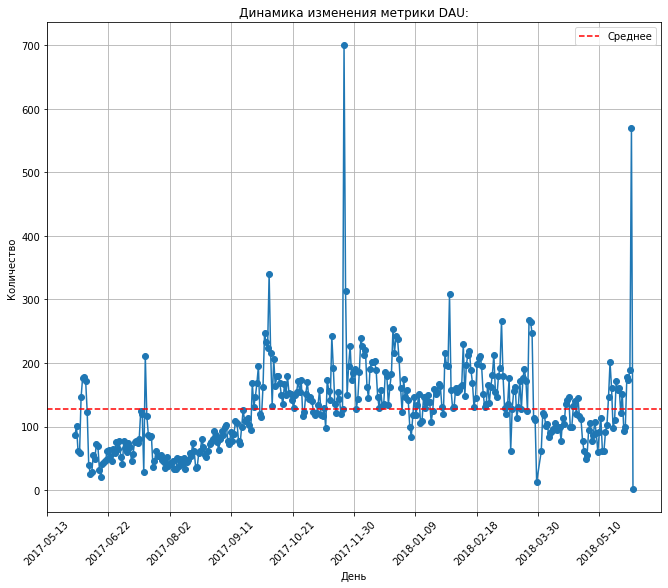

Среднее DAU: 128 пользователей


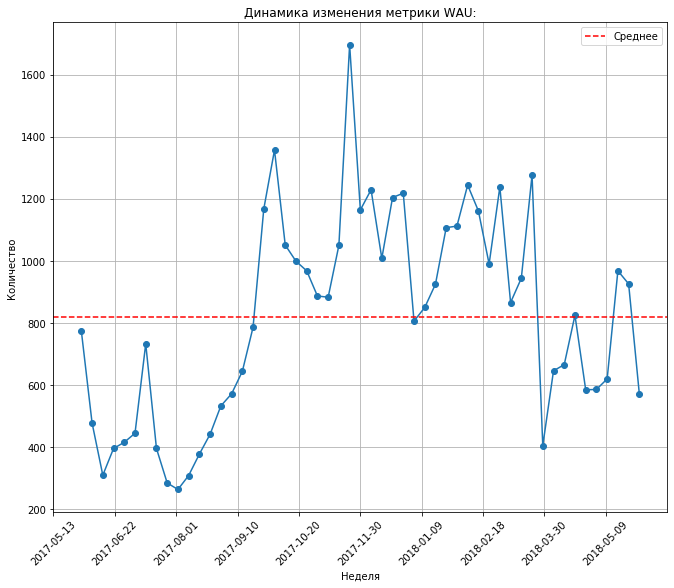

Среднее WAU: 818 пользователей


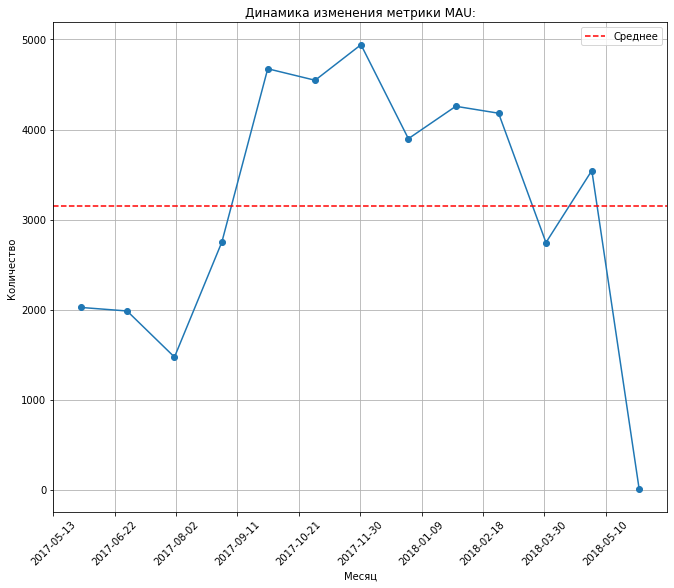

Среднее MAU: 3155 пользователей


In [22]:
def get_active_users_stat(df, groupby_col, agg_col_name):
    """
    Получение DAU, WAU, MAU
    """
#     группировка таблицы
    au_stat = orders.groupby(groupby_col).agg({'uid':'nunique'}).reset_index()
    au_stat = au_stat.rename(columns={
        'uid': agg_col_name,
        'purchase_day': groupby_col
    })
    
#     графики
    _, ax = plt.subplots(figsize=(11,9))
    plt.plot(au_stat[groupby_col], au_stat[agg_col_name], 'o-')
    plt.title('Динамика изменения метрики '+agg_col_name+':')
    start, end = ax.get_xlim()
    ax.xaxis.set_ticks(np.arange(start, end, (end-start)/10))
    if agg_col_name == 'DAU':
        plt.xlabel('День')
    elif agg_col_name == 'WAU':
        plt.xlabel('Неделя')
    elif agg_col_name == 'MAU':
        plt.xlabel('Месяц')
    else:
        plt.xlabel('Не определено')
    plt.ylabel('Количество')
    lmean = plt.axhline(au_stat[agg_col_name].mean(), linestyle='--', color='red')
    plt.legend((lmean,), ('Среднее',))
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()
    
#     отображение средней метрики
    print('Среднее {}:'.format(agg_col_name), '{}'.format(au_stat[agg_col_name]
                                                          .mean()
                                                          .round()
                                                          .astype('int')),
         'пользователей')
    return au_stat[agg_col_name].mean()

# DAU
DAU = get_active_users_stat(orders, 'purchase_day', 'DAU')
WAU = get_active_users_stat(orders, 'purchase_week', 'WAU')
MAU = get_active_users_stat(orders, 'purchase_month', 'MAU')

Вывод: Как видно, пользователи проявляют большую активность на сервисе с октября по март включительно (лучше всего это видно на посещении за неделю, т.к. она лучше всего соответствует периодичности посещения мероприятий людьми). Похоже, это связано с сезонностью и в теплые месяцы люди чаще выбирают прогулки и др. активность на свежем воздухе.

#### Сессий в день:

Построю гистограмму распределения для определения наиболее информативной величины:

Среднее: 901.83
Медиана: 921.0
Моды:


0     502
1     511
2    1045
3    1173
4    1411
dtype: int64

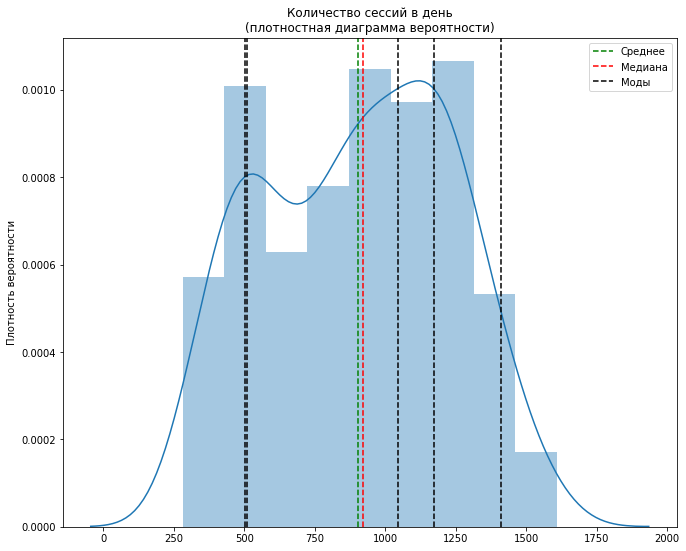

In [23]:
visits_dist = visits.groupby('session_date')['uid'].nunique()
def plot_dist(dist, title=''):
#     уберу хвосты
    dmin = dist.quantile(q=0.01)
    dmax = dist.quantile(q=0.99)
    dist = dist[(dist >= dmin)&(dist <=dmax)]
    
#     среднее
    dmean = dist.mean()
    print('Среднее:', dmean.round(2))

#     медиана
    dmed = dist.median()
    print('Медиана:', dmed.round(2))

#     моды
    dmodes = dist.mode()
    print('Моды:')
    display(dmodes)

#     графики
    _, ax = plt.subplots(figsize=(11,9))
    sns.distplot(dist, ax=ax)
    plt.ylabel('Плотность вероятности')
    plt.xlabel('')
    lmean = plt.axvline(dmean, color='green', linestyle='--')
    lmed = plt.axvline(dmed, color='red', linestyle='--')
    for m in dmodes:
        lmode = plt.axvline(m, color='black', linestyle='--')
    plt.title(title)
    plt.legend((lmean, lmed, lmode), ('Среднее', 'Медиана', 'Моды'))
    plt.show()
    
plot_dist(visits_dist, 'Количество сессий в день\n(плотностная диаграмма вероятности)')

Подходит медиана.

In [24]:
print('Сессий в день (медиана):')
visits.groupby('session_date').agg({'uid': 'nunique'}).median()

Сессий в день (медиана):


uid   921.00
dtype: float64

#### Сколько длится одна сессия?

Среднее: 582.69
Медиана: 300.0
Моды:


0   60.00
dtype: float64

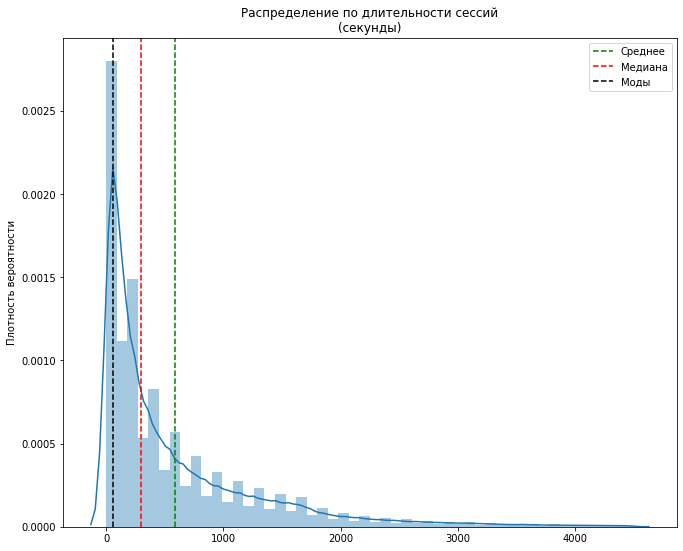

In [25]:
sess_dist = (visits.ts_end - visits.ts_start).dt.total_seconds()

plot_dist(sess_dist, 'Распределение по длительности сессий\n(секунды)')

Очевидно, наиболее информативна мода.

In [26]:
# моды
sess_dist.mode()

0   60.00
dtype: float64

In [27]:
print('Чаще всего встречается время сессии: {:.2f}'.format(
      (sess_dist.mode()[0])
),
     'секунд')

Чаще всего встречается время сессии: 60.00 секунд


60 секунд - мало для того, чтобы выбрать мероприятие, скорее всего, пользователи попадали на страницу конкретного мероприятия или соглашались приобрести билеты на главные. В любом случае налицо **проблема**, что **функционал** сервиса не использовался в полной мере.

#### Как часто люди возвращаются?

На этот вопрос отвечает метрика *retention rate*, рассчитаю её раздельно по когортам, сформированным по месяцу первой сессии пользователя.

In [28]:
# группирую данные по заказам от пользователей по когортам и месяцам жизни
users_stat1 = (orders
.groupby(['first_order_month', 'purchase_month'], as_index=False)
.agg({'uid': 'nunique'})
.rename(columns={'uid':'users'}))
users_stat1

,first_order_month,purchase_month,users
0,2017-06-01,2017-06-01,2023
1,2017-06-01,2017-07-01,61
2,2017-06-01,2017-08-01,50
3,2017-06-01,2017-09-01,54
4,2017-06-01,2017-10-01,88
...,...,...,...
74,2018-03-01,2018-05-01,58
75,2018-04-01,2018-04-01,2276
76,2018-04-01,2018-05-01,69
77,2018-05-01,2018-05-01,2988


In [29]:
# добавляю столбец месяца жизни явно
users_stat1['lifetime'] = (
    ((users_stat1.purchase_month - users_stat1.first_order_month) / np.timedelta64(1, 'M')
    ).round().astype('int')
)
users_stat1

,first_order_month,purchase_month,users,lifetime
0,2017-06-01,2017-06-01,2023,0
1,2017-06-01,2017-07-01,61,1
2,2017-06-01,2017-08-01,50,2
3,2017-06-01,2017-09-01,54,3
4,2017-06-01,2017-10-01,88,4
...,...,...,...,...
74,2018-03-01,2018-05-01,58,2
75,2018-04-01,2018-04-01,2276,0
76,2018-04-01,2018-05-01,69,1
77,2018-05-01,2018-05-01,2988,0


In [30]:
# сводная таблица Коэффициента удержания пользователей
users_ret_rate = users_stat1.pivot_table(index='first_order_month',
                       columns='lifetime',
                       values='users',
                       aggfunc='sum').fillna(0)
users_ret_rate= users_ret_rate.apply(lambda x: x / x[0], axis=1)
users_ret_rate

lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,1.00,0.03,0.02,0.03,0.04,0.03,0.03,0.02,0.03,0.02,0.02,0.03
2017-07-01,1.00,0.03,0.03,0.03,0.03,0.02,0.02,0.02,0.02,0.01,0.01,0.00
2017-08-01,1.00,0.04,0.04,0.03,0.03,0.02,0.02,0.03,0.01,0.02,0.00,0.00
2017-09-01,1.00,0.05,0.04,0.03,0.02,0.02,0.03,0.01,0.02,0.00,0.00,0.00
2017-10-01,1.00,0.05,0.03,0.02,0.02,0.02,0.01,0.02,0.00,0.00,0.00,0.00
2017-11-01,1.00,0.05,0.03,0.03,0.02,0.01,0.02,0.00,0.00,0.00,0.00,0.00
2017-12-01,1.00,0.03,0.02,0.02,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00
2018-01-01,1.00,0.03,0.02,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2018-02-01,1.00,0.03,0.02,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [31]:
# нормирование прошло успешно, удалю первый столбец
users_ret_rate.drop(columns=[0], inplace=True)

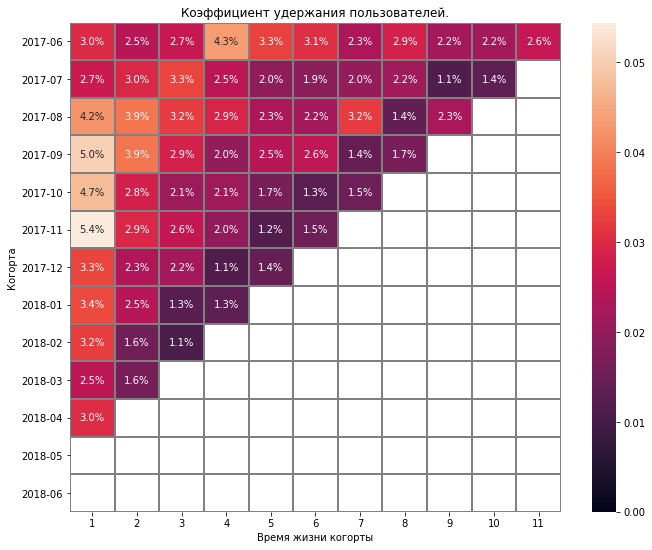

In [32]:
# тепловая карта
_, ax = plt.subplots(figsize=(11,9))
users_ret_rate.index = pd.Series(users_ret_rate.index).dt.strftime('%Y-%m')
sns.heatmap(users_ret_rate, annot=True, fmt='.1%', ax=ax,
           linecolor='gray', linewidths=1, mask=users_ret_rate==0)
plt.title('Коэффициент удержания пользователей.')
plt.xlabel('Время жизни когорты')
plt.ylabel('Когорта')
plt.show()

К концу 1-го месяца жизни когорт в них остаются от 5,5 до 2,5% активных пользователей. Есть разброс по количеству между когортами, однако повышение или понижение активности пользователей *не происходит одновременно* по всем когортам (не видно явных диагоналей). **Основные проблемы** и неправильные решения заключены в **0-м месяце** когорт, стоит его изучить внимательнее.

In [33]:
# усреднение по когортам
users_ret_rate[users_ret_rate==0] = None
users_ret_rate_mean = users_ret_rate.mean()
users_ret_rate_mean = pd.DataFrame(data=[users_ret_rate_mean], columns=users_ret_rate_mean.index,
                                   index=['mean'])
users_ret_rate_mean

lifetime,1,2,3,4,5,6,7,8,9,10,11
mean,0.04,0.03,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.03


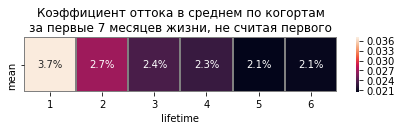

In [34]:
# усреднение по 6 и более когортам:
_, ax = plt.subplots(figsize=(7,1))
sns.heatmap(users_ret_rate_mean.iloc[:,:6], annot=True, fmt='.1%', ax=ax,
           linecolor='gray', linewidths=1)
plt.title('Коэффициент оттока в среднем по когортам\nза первые 7 месяцев жизни, не считая первого')
plt.show()

### Продажи

Найду ответы на вопросы:
- Когда люди начинают покупать?
- Сколько раз покупают за период?
- Какой средний чек?
- Сколько денег приносят? (LTV)

Для ответов на вопросы этого раздела нужно будет объединить таблицы *visits* и *orders*. Таблица *costs* здесь не понадобится.  
Т.к. в условии проекта не указана маржинальность, считаю её за 100%.

#### Для начала составлю простые соотношения по выручке.

Соотношение выручки с настольной и мобильной версий приложения


device_type
desktop   83.92
touch     16.08
Name: revenue_per_order, dtype: float64

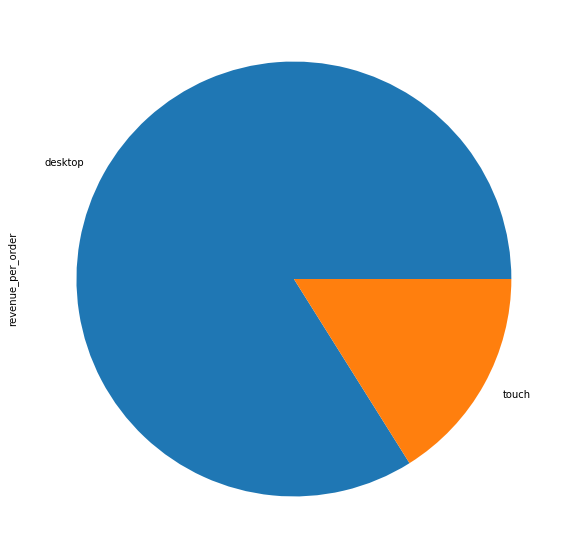

In [35]:
orders_by_dev = orders.groupby('device_type')['revenue_per_order'].sum()

print('Соотношение выручки с настольной и мобильной версий приложения')
display(orders_by_dev / orders_by_dev.sum() * 100)

_, ax = plt.subplots(figsize=(10,10))
orders_by_dev.plot(kind='pie', ax=ax)
plt.show()

Выручка с мобильных устройств составляет всего 16%!, и это для сервиса *outgoing* мероприятий, явно с мобильной версией что-то не так.

#### Когда люди начинают покупать?

Для ответа на этот вопрос вычислю среднее время от начала первой сессии до первой покупки (т.к. покупка необязательно произойдёт в течение этой первой сесссии, в общем случае нужно рассмотреть и другие).

In [36]:
visits.info()
print()
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359400 entries, 0 to 359399
Data columns (total 9 columns):
device_type            359400 non-null object
ts_end                 359400 non-null datetime64[ns]
id_source              359400 non-null int64
ts_start               359400 non-null datetime64[ns]
uid                    359400 non-null uint64
session_date           359400 non-null datetime64[ns]
first_session_date     359400 non-null datetime64[ns]
first_session_month    359400 non-null object
months_from_reg        359400 non-null int64
dtypes: datetime64[ns](4), int64(2), object(2), uint64(1)
memory usage: 27.4+ MB

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50415 entries, 0 to 50414
Data columns (total 10 columns):
purchase_time          50415 non-null datetime64[ns]
revenue_per_order      50415 non-null float64
uid                    50415 non-null uint64
purchase_day           50415 non-null datetime64[ns]
purchase_week          50415 non-null datetime64[ns]
purch

In [37]:
# получение списка первых заказов и сессий по пользователям
users_first_sessions = visits.groupby('uid')['ts_start'].min().reset_index()
users_first_sessions = (users_first_sessions
                       .rename(columns={'ts_start': 'first_session_start'}))

users_first_orders = orders.groupby('uid')['purchase_time'].min().reset_index()

# левое соединение таблиц оставляет все сессии, даже без заказов
users_first_all = users_first_sessions.merge(users_first_orders, how='left', on='uid')

users_stat = users_first_all.isnull().sum().to_frame('Количество')
users_stat['Проценты'] = users_stat['Количество'] / users_first_all.shape[0] * 100
print('Пользователи без покупок:')
display(users_stat)

Пользователи без покупок:


,Количество,Проценты
uid,0,0.00
first_session_start,0,0.00
purchase_time,191646,83.99


Покупки делают лишь 16% пользователей.
##### Определю среднее время от начала первой сессии до первой покупки по этим пользователям.

In [38]:
# удаляю пользователей без покупок
users_first_all = users_first_all.dropna().reset_index(drop=True)

users_first_all.head()

,uid,first_session_start,purchase_time
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00


In [39]:
# для каждого пользователя считаю время от начала первой сессии до его первой покупки
users_first_all['time_to_purchase'] = users_first_all.purchase_time - users_first_all.first_session_start

Среднее: 630.06
Медиана: 300.0
Моды:


0   60.00
dtype: float64

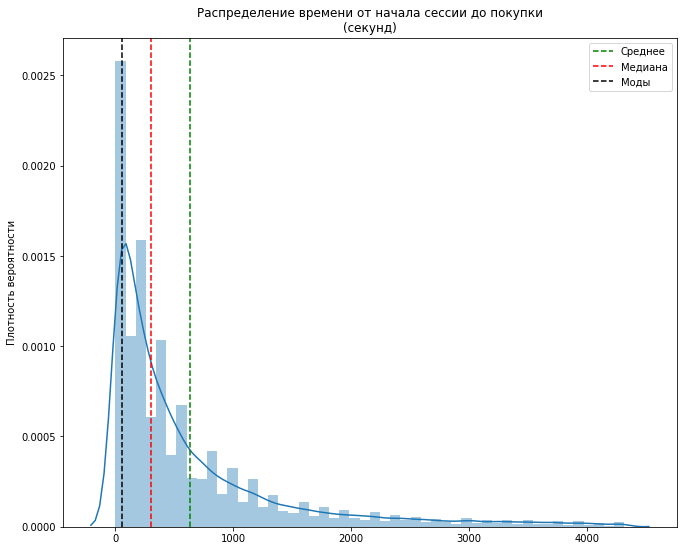

In [40]:
# построю гистограмму распределения
plot_dist(users_first_all[users_first_all['time_to_purchase'].dt.total_seconds() < 5_000]\
          ['time_to_purchase'].dt.total_seconds(),
         'Распределение времени от начала сессии до покупки\n(секунд)')

In [41]:
# моды
users_first_all.time_to_purchase.mode()

0   00:01:00
dtype: timedelta64[ns]

In [42]:
# проверка нулевых значений (возможны при округлении)
users_first_all[users_first_all.time_to_purchase == 0]['time_to_purchase'].count()

0

In [43]:
print('Наиболее распространенное время от начала сессии до покупки:',
      users_first_all.time_to_purchase.mode().dt.total_seconds()[0].round(), 'секунд')

Наиболее распространенное время от начала сессии до покупки: 60.0 секунд


Среднее совпадает со средней длительностью сессии, и график практически идентичен. Выходит, пользователи совершают покупку чаще всего в первую сессию.

#### Сколько раз покупают за период?

In [44]:
users_month_orders = orders.groupby(['purchase_month', 'uid']).agg({'purchase_time': 'nunique'}).reset_index()
users_month_stat = users_month_orders.groupby('purchase_month').agg({'uid': 'nunique', 'purchase_time': 'mean'})
users_month_stat = users_month_stat.rename(columns={'uid': 'users', 'purchase_time': 'mean_sessions'})
users_month_stat

,users,mean_sessions
purchase_month,,
2017-06-01,2023,1.16
2017-07-01,1984,1.19
2017-08-01,1472,1.23
2017-09-01,2750,1.23
2017-10-01,4675,1.21
2017-11-01,4547,1.24
2017-12-01,4942,1.26
2018-01-01,3898,1.21
2018-02-01,4258,1.24


In [45]:
print('Среди тех, кто делает заказы, в среднем за месяц заказывают: {:.2f} раз'.format(users_month_stat[users_month_stat.users > 1]['mean_sessions'].mean()))

Среди тех, кто делает заказы, в среднем за месяц заказывают: 1.22 раз


Количество заказов на пользователя сохраняет стабильность (от 1.16 до 1.27 в среднем в месяц), однако находится на очень низком уровне.

#### Какой средний чек (с покупателя)?

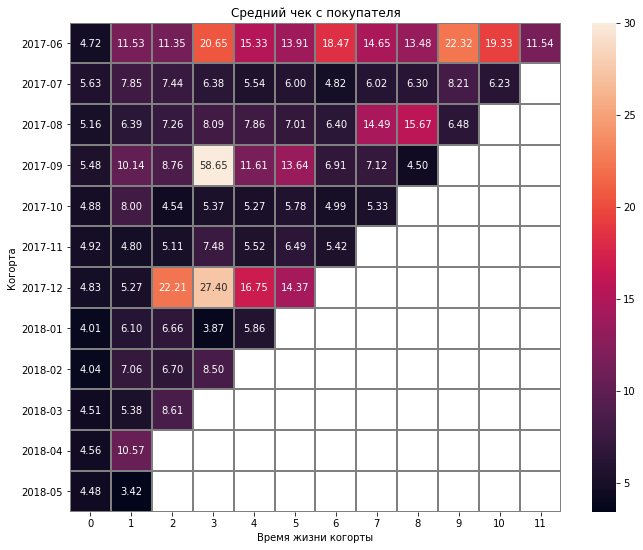

In [46]:
def display_mean_revenue(ords, vmax=None):
    """
    Средний чек с покупателя
    """
    ords_stat0 = (
        ords
        .groupby(['first_session_month', 'purchase_month'])
        .agg({'revenue_per_order': 'sum', 'uid': 'nunique'})
        .reset_index()
    )

    ords_stat0['lifetime'] = ((ords_stat0['purchase_month'] - 
                               pd.to_datetime(ords_stat0['first_session_month'])) /\
                              np.timedelta64(1, 'M')).round().astype('int')
    ords_stat0 = ords_stat0.\
    rename(columns={'revenue_per_order':'month_revenue', 'uid': 'users'})

# делю всю выручку за месяц на количество АКТИВНЫХ пользователей
    ords_stat0['mean_revenue'] = ords_stat0['month_revenue'] / ords_stat0['users']
    revenue_table = ords_stat0.pivot_table(index='first_session_month',
                                           columns='lifetime',
                                           values='mean_revenue',
                                           aggfunc='mean')

#     тепловая карта
    _, ax = plt.subplots(figsize=(11,9))
    sns.heatmap(revenue_table, annot=True, fmt='.2f', ax=ax, mask=revenue_table.isnull(),
               linecolor='gray', linewidths=1, vmax=vmax)
    plt.title('Средний чек с покупателя')
    plt.xlabel('Время жизни когорты')
    plt.ylabel('Когорта')
    plt.show()
    
display_mean_revenue(orders, vmax=30)

На тепловой карте видны месяцы, когда совершались крупные покупки, но в целом средний чек при увеличении времени жизни когорты практически не меняется, имеет слабую тенденцию к увеличению почти во всех когортах.

##### Средний чек в зависимости от устройства:

In [47]:
# средний чек по устройствам:
stat_dev = (
    orders
#     группировка по устройствам и месяцам
    .groupby(['device_type', 'purchase_month'])
    .agg({'uid': 'nunique', 'revenue_per_order': 'sum'})
    .rename(columns={'uid': 'users', 'revenue_per_order': 'total_revenue'})
)
stat_dev

users  total_revenue
device_type purchase_month                      
desktop     2017-06-01       1676        8172.04
            2017-07-01       1557        9829.05
            2017-08-01       1195        7277.47
            2017-09-01       2213       15801.84
            2017-10-01       3806       23031.27
            2017-11-01       3703       21428.21
            2017-12-01       3976       32575.33
            2018-01-01       3103       16180.57
            2018-02-01       3336       21844.99
            2018-03-01       3347       23840.90
            2018-04-01       2247       14232.67
            2018-05-01       2825       17314.05
            2018-06-01          1           3.42
touch       2017-06-01        347        1385.45
            2017-07-01        427        2710.42
            2017-08-01        277        1481.31
            2017-09-01        537        2543.67
            2017-10-01        869        4956.43
            2017-11-01        844        5641.72
            2017-12-01        966        3813.27
            2018-01-01        795        3236.56
            2018-02-01        922        3715.55
            2018-03-01        834        4993.69
            2018-04-01        497        2625.39
            2018-05-01        719        3421.93

In [48]:
stat_dev['revenue_per_user'] = stat_dev.total_revenue / stat_dev.users
stat_dev

users  total_revenue  revenue_per_user
device_type purchase_month                                        
desktop     2017-06-01       1676        8172.04              4.88
            2017-07-01       1557        9829.05              6.31
            2017-08-01       1195        7277.47              6.09
            2017-09-01       2213       15801.84              7.14
            2017-10-01       3806       23031.27              6.05
            2017-11-01       3703       21428.21              5.79
            2017-12-01       3976       32575.33              8.19
            2018-01-01       3103       16180.57              5.21
            2018-02-01       3336       21844.99              6.55
            2018-03-01       3347       23840.90              7.12
            2018-04-01       2247       14232.67              6.33
            2018-05-01       2825       17314.05              6.13
            2018-06-01          1           3.42              3.42
touch       2017-06-01        347        1385.45              3.99
            2017-07-01        427        2710.42              6.35
            2017-08-01        277        1481.31              5.35
            2017-09-01        537        2543.67              4.74
            2017-10-01        869        4956.43              5.70
            2017-11-01        844        5641.72              6.68
            2017-12-01        966        3813.27              3.95
            2018-01-01        795        3236.56              4.07
            2018-02-01        922        3715.55              4.03
            2018-03-01        834        4993.69              5.99
            2018-04-01        497        2625.39              5.28
            2018-05-01        719        3421.93              4.76

In [49]:
#     группировка по устройствам, кол-во пользователей даже с одинаковым
#     uid суммируется (т.к. разные месяцы), по суммарным чекам вычисляю среднее
revenue_mean_by_dev = (stat_dev
.groupby('device_type')
    .agg({'revenue_per_user': 'mean'})
             .rename(columns={'revenue_per_user': 'mean_revenue'})
)

pd.options.display.float_format = '{:.2f} руб.'.format
print('Средний чек в зависимости от устройства:')
display(revenue_mean_by_dev)
pd.options.display.float_format = '{:.2f}'.format

Средний чек в зависимости от устройства:


,mean_revenue
device_type,
desktop,6.09 руб.
touch,5.07 руб.


Вывод: средний чек для пользователя компьютера больше пользователя мобильного устройства, хотя по логике, т.к. в заказе билетов важна мобильность, должно быть наоборот. Стоит повнимательнее изучить мобильную версию на предмет ошибок.

In [50]:
# расчет среднего "среднего чека"
ords_stat = (orders
            .groupby(['purchase_month'])
            .agg({'revenue_per_order': 'sum', 'uid': 'nunique'})
            .reset_index()
            .rename(columns={'revenue_per_order':'month_revenue', 'uid': 'users'}))
ords_stat

,purchase_month,month_revenue,users
0,2017-06-01,9557.49,2023
1,2017-07-01,12539.47,1984
2,2017-08-01,8758.78,1472
3,2017-09-01,18345.51,2750
4,2017-10-01,27987.70,4675
5,2017-11-01,27069.93,4547
6,2017-12-01,36388.60,4942
7,2018-01-01,19417.13,3898
8,2018-02-01,25560.54,4258
9,2018-03-01,28834.59,4181


In [51]:
# делю выручку за месяц на количество активных пользователей в этом месяце
ords_stat['mean_revenue'] = ords_stat['month_revenue'] / ords_stat['users']
ords_stat

,purchase_month,month_revenue,users,mean_revenue
0,2017-06-01,9557.49,2023,4.72
1,2017-07-01,12539.47,1984,6.32
2,2017-08-01,8758.78,1472,5.95
3,2017-09-01,18345.51,2750,6.67
4,2017-10-01,27987.70,4675,5.99
5,2017-11-01,27069.93,4547,5.95
6,2017-12-01,36388.60,4942,7.36
7,2018-01-01,19417.13,3898,4.98
8,2018-02-01,25560.54,4258,6.00
9,2018-03-01,28834.59,4181,6.90


Среднее для каждого месяца считаю в соответствии с количеством активных пользователей на соответствующий месяц.

In [52]:
# Средний "средний чек"
mean_mean_revenue = ords_stat['mean_revenue'].mean().round(2)
print('Средний "средний чек":', mean_mean_revenue, 'руб.')

Средний "средний чек": 5.87 руб.


Т.к. это метрика роста, компании следует сравнить её со значением за предыдущие периоды, чтобы понять динамику.

##### Средний чек по нулевым срокам жизни когорт:

In [53]:
# фильтрую заказы, оставляя только на 0-е сроки жизни когорт
orders_0_lifetime = orders[orders.first_order_month == orders.purchase_month]
print('Процент заказов по нулевому сроку жизни когорт: {:.0%}'.format(
      (orders_0_lifetime.shape[0] / orders.shape[0]))
     )
# првоерка
orders_0_lifetime[['purchase_month', 'first_order_month']].sample(5)

Процент заказов по нулевому сроку жизни когорт: 82%


,purchase_month,first_order_month
38115,2018-03-01,2018-03-01
16761,2017-11-01,2017-11-01
32090,2018-01-01,2018-01-01
26690,2017-12-01,2017-12-01
21245,2017-11-01,2017-11-01


In [54]:
# статистика 
mean_revenue_0_lifetime_months = (orders_0_lifetime
                                  .groupby('first_order_month')
                                  .agg({'uid':'nunique', 'revenue_per_order': 'sum'})
                                 .rename(columns={'uid': 'users',
                                                  'revenue_per_order': 'total_revenue'}))
mean_revenue_0_lifetime_months

,users,total_revenue
first_order_month,,
2017-06-01,2023,9557.49
2017-07-01,1923,11557.65
2017-08-01,1370,7228.83
2017-09-01,2581,14568.53
2017-10-01,4340,21716.20
2017-11-01,4081,21036.26
2017-12-01,4383,20767.49
2018-01-01,3373,13949.50
2018-02-01,3651,15177.16


In [55]:
# рассчитываю средний чек по каждой когорте
mean_revenue_0_lifetime_months['mean_revenue'] = mean_revenue_0_lifetime_months.total_revenue /\
mean_revenue_0_lifetime_months.users
mean_revenue_0_lifetime_months

,users,total_revenue,mean_revenue
first_order_month,,,
2017-06-01,2023,9557.49,4.72
2017-07-01,1923,11557.65,6.01
2017-08-01,1370,7228.83,5.28
2017-09-01,2581,14568.53,5.64
2017-10-01,4340,21716.20,5.00
2017-11-01,4081,21036.26,5.15
2017-12-01,4383,20767.49,4.74
2018-01-01,3373,13949.50,4.14
2018-02-01,3651,15177.16,4.16


In [56]:
# средний чек по всем когортам (за 0-й месяц жизни)
mean_revenue_0_lifetime = mean_revenue_0_lifetime_months.mean_revenue.mean()
print('Средний чек за нулевой месяц жизни когорт', mean_revenue_0_lifetime.round(2), 'руб.')

Средний чек за нулевой месяц жизни когорт 4.8 руб.


In [57]:
print('В среднем за нулевой месяц жизни когорт пользователи платят {:.0%} от среднего чека'.format(mean_revenue_0_lifetime / mean_mean_revenue))

В среднем за нулевой месяц жизни когорт пользователи платят 82% от среднего чека


Вывод: за нулевой месяц жизни когорт совершается 82% заказов на 82% от среднего чека пользователя. После этого выручка резко падает (более 5 раз суммарно за все оставшиеся месяцы).

#### Сколько денег приносят? (LTV)

In [58]:
# сгруппирую данные по когортам
cohorts_revenue_by_month = (orders
                           .groupby(['first_order_month', 'purchase_month'])
                           .agg({'revenue_per_order': 'sum'})
                           .reset_index())
cohorts_revenue_by_month = (cohorts_revenue_by_month
                           .rename(columns={'revenue_per_order': 'revenue'}))
cohorts_revenue_by_month

,first_order_month,purchase_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58
...,...,...,...
74,2018-03-01,2018-05-01,1114.87
75,2018-04-01,2018-04-01,10600.69
76,2018-04-01,2018-05-01,1209.92
77,2018-05-01,2018-05-01,13925.76


In [59]:
# размеры когорт
cohort_sizes = (orders
               .groupby('first_order_month')
               .agg({'uid': 'nunique'})
               .reset_index()
               .rename(columns={'uid': 'cohort_users'}))
cohort_sizes

,first_order_month,cohort_users
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


In [60]:
# ltv на каждый месяц:
cohorts_revenue_by_month = cohorts_revenue_by_month.merge(cohort_sizes,
                                                          on='first_order_month',
                                                          how='left')
cohorts_revenue_by_month

,first_order_month,purchase_month,revenue,cohort_users
0,2017-06-01,2017-06-01,9557.49,2023
1,2017-06-01,2017-07-01,981.82,2023
2,2017-06-01,2017-08-01,885.34,2023
3,2017-06-01,2017-09-01,1931.30,2023
4,2017-06-01,2017-10-01,2068.58,2023
...,...,...,...,...
74,2018-03-01,2018-05-01,1114.87,3533
75,2018-04-01,2018-04-01,10600.69,2276
76,2018-04-01,2018-05-01,1209.92,2276
77,2018-05-01,2018-05-01,13925.76,2988


In [61]:
# вычислю LTV
cohorts_revenue_by_month['ltv'] = cohorts_revenue_by_month['revenue'] /\
cohorts_revenue_by_month['cohort_users']
# вычислю месяц для каждого заказа по когорте
cohorts_revenue_by_month['lifetime'] = \
((cohorts_revenue_by_month['purchase_month'] - 
  pd.to_datetime(cohorts_revenue_by_month['first_order_month'])) /\
 np.timedelta64(1, 'M')).round().astype('int')
cohorts_revenue_by_month

,first_order_month,purchase_month,revenue,cohort_users,ltv,lifetime
0,2017-06-01,2017-06-01,9557.49,2023,4.72,0
1,2017-06-01,2017-07-01,981.82,2023,0.49,1
2,2017-06-01,2017-08-01,885.34,2023,0.44,2
3,2017-06-01,2017-09-01,1931.30,2023,0.95,3
4,2017-06-01,2017-10-01,2068.58,2023,1.02,4
...,...,...,...,...,...,...
74,2018-03-01,2018-05-01,1114.87,3533,0.32,2
75,2018-04-01,2018-04-01,10600.69,2276,4.66,0
76,2018-04-01,2018-05-01,1209.92,2276,0.53,1
77,2018-05-01,2018-05-01,13925.76,2988,4.66,0


In [62]:
# сводная таблица LTV
LTV_per_cohort = (cohorts_revenue_by_month
                  .pivot_table(index='first_order_month', columns='lifetime',
                               values='ltv', aggfunc='mean')
                 )
LTV_per_cohort = LTV_per_cohort.cumsum(axis=1)
LTV_per_cohort.index = pd.Series(LTV_per_cohort.index).dt.strftime('%Y-%m')

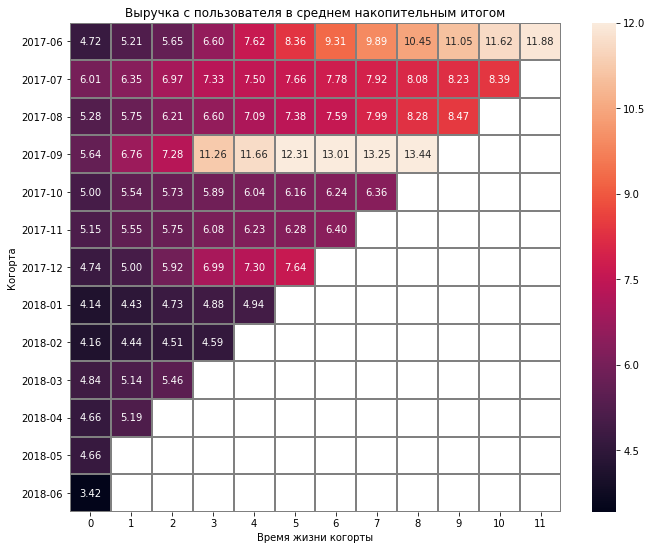

In [63]:
# сводная таблица LTV
_, ax = plt.subplots(figsize=(11,9))
sns.heatmap(LTV_per_cohort, annot=True, fmt='.2f', ax=ax, linecolor='gray', linewidths=1, vmax=12)
ax.set_title('Выручка с пользователя в среднем накопительным итогом')
ax.set_ylabel('Когорта')
ax.set_xlabel('Время жизни когорты')
plt.show()

In [64]:
print('LTV за первые 6 месяцев: {:.2f} руб.'.format(LTV_per_cohort.mean(axis=0)[5]))

LTV за первые 6 месяцев: 7.97 руб.


Вывод: первая когорта явно лидирует, общие темпы увеличения LTV там выше. Её догоняет когорта сентября 2017, но лишь за счет покупок в третьем месяце жизни (декабрь 2017). Возможно, менеджер по первоналу компании оформил все билеты для сотрудников на свой аккаунт. К тому же это происходит в декабре, похоже на новогодний корпоратив.
Но другие когорты явно отстают, ситуация удручающая.

#### Изменение во времени выручки по устройствам

In [65]:
orders_stat_by_month = orders.groupby(['purchase_month', 'device_type'])['revenue_per_order'].sum().unstack()

In [66]:
orders_stat_by_month = orders_stat_by_month.fillna(0)

In [67]:
print('Соотношение выручки по устройствам')
orders_stat_by_month

Соотношение выручки по устройствам


device_type,desktop,touch
purchase_month,,
2017-06-01,8172.04,1385.45
2017-07-01,9829.05,2710.42
2017-08-01,7277.47,1481.31
2017-09-01,15801.84,2543.67
2017-10-01,23031.27,4956.43
2017-11-01,21428.21,5641.72
2017-12-01,32575.33,3813.27
2018-01-01,16180.57,3236.56
2018-02-01,21844.99,3715.55


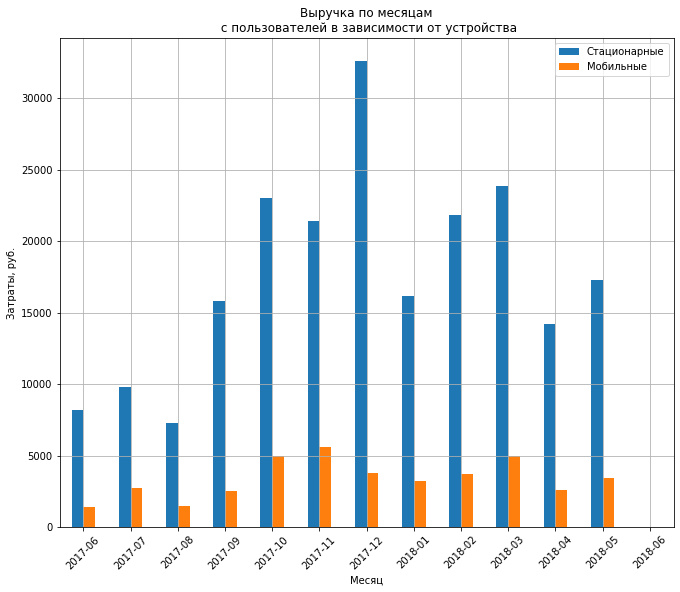

In [68]:
_, ax = plt.subplots(figsize=(11,9))
orders_stat_by_month.index = pd.to_datetime(orders_stat_by_month.index).strftime('%Y-%m')
orders_stat_by_month.plot(kind='bar', ax=ax)
plt.legend(('Стационарные', 'Мобильные'))
plt.title('Выручка по месяцам\n с пользователей в зависимости от устройства')
plt.xlabel('Месяц')
plt.ylabel('Затраты, руб.')
plt.xticks(rotation=45)
plt.grid()
plt.show()

Ещё одно доказательство проблем с мобильной версией.

### Маркетинг
- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько стоило привлечение одного покупателя из каждого источника?
- На сколько окупились расходы? (ROMI)
- Отобразите на графиках, как эти метрики отличаются по устройствам и по рекламным источникам? Как они меняются во времени?

#### Сколько денег потратили? Всего / на каждый источник / по времени

Всего:

In [69]:
print('Потратили всего: {:.2f} руб.'.format(costs.cost_per_day.sum()))

Потратили всего: 329131.62 руб.


Общее соотношение затрат по источникам:

In [70]:
costs_per_sources = costs.groupby('id_source').cost_per_day.sum()
for i in [6,7,8]:
    costs_per_sources.loc[i] = 0
costs_per_sources = costs_per_sources.sort_index()

costs_per_sources

id_source
1     20833.27
2     42806.04
3    141321.63
4     61073.60
5     51757.10
6         0.00
7         0.00
8         0.00
9      5517.49
10     5822.49
Name: cost_per_day, dtype: float64

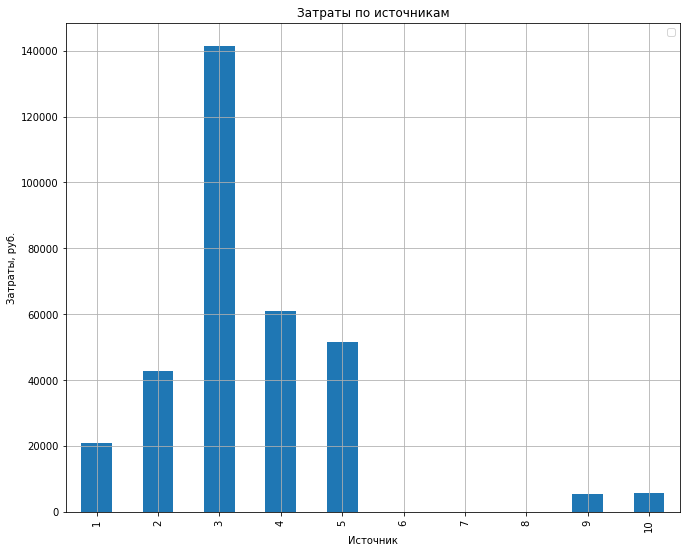

In [71]:
# график затрат по источникам
fig, ax = plt.subplots(figsize=(11,9))
costs_per_sources.plot(kind='bar', ax=ax)
plt.title('Затраты по источникам')
plt.xlabel('Источник')
plt.ylabel('Затраты, руб.')
plt.legend('')
plt.grid()
plt.show()

3 источник - лидер по затратам, на 9, 10 что-то тратится, но меньше других, а 6-8 источники вообще не используются.

#### По времени:

In [72]:
# сводная таблица по месяцам
costs['date_month'] = costs['date'].dt.strftime('%Y-%m')

In [73]:
costs_stat = costs.groupby(['date_month','id_source'])['cost_per_day'].sum().reset_index()
costs_stat

,date_month,id_source,cost_per_day
0,2017-06,1,1125.61
1,2017-06,2,2427.38
2,2017-06,3,7731.65
3,2017-06,4,3514.80
4,2017-06,5,2616.12
...,...,...,...
79,2018-05,3,9411.42
80,2018-05,4,4214.21
81,2018-05,5,3669.56
82,2018-05,9,362.17


In [74]:
costs_table = costs_stat.pivot_table(index='date_month', 
                                     columns='id_source',
                                     values='cost_per_day',
                                     aggfunc='sum')

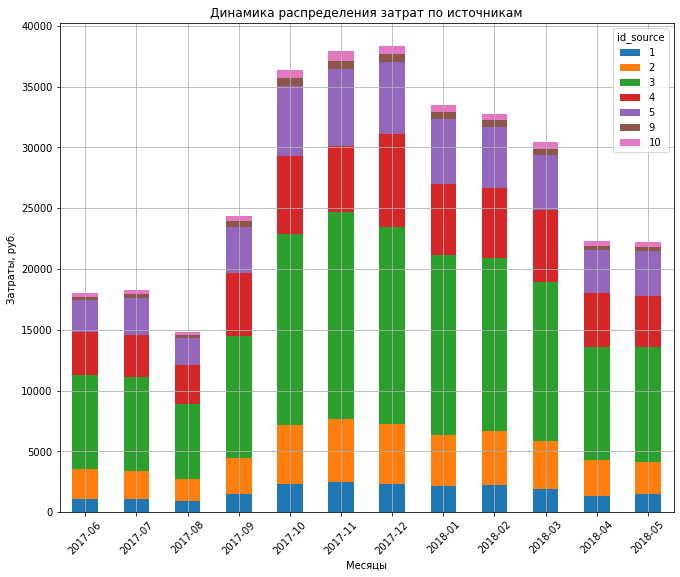

In [75]:
# график
_, ax = plt.subplots(figsize=(11,9))
costs_table.plot(kind='bar', stacked=True, ax=ax)
plt.title('Динамика распределения затрат по источникам')
plt.xlabel('Месяцы')
plt.ylabel('Затраты, руб.')
plt.xticks(rotation=45)
plt.grid()
plt.show()

Как видно, менялись затраты в целом по источникам, наибольшие были в октябре - декабре 2017, наиеньшие - в июне-августа 2017, а соотношение по источникам оставалось приблизительно одинаковым. На графике виден довольно большой разброс по суммарным затратам, среднее квадратическое отклонение равно 8405 руб. или 31% от среднего.

##### Рассчитаю среднее квадратическое отклонение:

In [76]:
costs_total_by_month = costs.groupby('costs_month').agg({'cost_per_day': 'sum'})
costs_total_by_month

,cost_per_day
costs_month,
2017-06-01,18015.00
2017-07-01,18240.59
2017-08-01,14790.54
2017-09-01,24368.91
2017-10-01,36322.88
2017-11-01,37907.88
2017-12-01,38315.35
2018-01-01,33518.52
2018-02-01,32723.03


Среднее:

In [77]:
costs_mean_by_month = costs_total_by_month.mean().values[0]

In [78]:
costs_std = costs_total_by_month.cost_per_day.std().round()

In [79]:
print('Среднее квадратическое отклонение суммарных затрат по месяцам:', costs_std, 'руб.')
print('В процентах от среднего: {:.0%}'.format(costs_std / costs_mean_by_month))

Среднее квадратическое отклонение суммарных затрат по месяцам: 8405.0 руб.
В процентах от среднего: 31%


#### Сколько стоило привлечение одного покупателя из каждого источника?

In [80]:
# таблица по месяцам первых заказов пользователей для формирования размера когорт
users_first_orders_months = (orders
                            .sort_values(by='purchase_time', ascending=True)
                            .groupby('uid', as_index=False)
                            .agg({'purchase_month':'first'})
                            .rename(columns={'purchase_month': 'first_order_month',
                                   })
                            )
users_first_orders_months

,uid,first_order_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01
...,...,...
36518,18445147675727495770,2017-11-01
36519,18445407535914413204,2017-09-01
36520,18445601152732270159,2018-03-01
36521,18446156210226471712,2018-02-01


In [81]:
# определение источника каждого пользователя
users_sources = (visits
                .sort_values(by='ts_start')
                .groupby('uid', as_index=False)
                .agg({'id_source': 'first'}))
users_sources

,uid,id_source
0,11863502262781,3
1,49537067089222,2
2,297729379853735,3
3,313578113262317,2
4,325320750514679,5
...,...,...
228164,18446403737806311543,5
228165,18446424184725333426,4
228166,18446556406699109058,3
228167,18446621818809592527,4


In [82]:
# соединение таблиц, теперь для каждого пользователя известна его когорта и источник
users_orders_info = users_first_orders_months.merge(users_sources, on='uid', how='left')
users_orders_info

,uid,first_order_month,id_source
0,313578113262317,2018-01-01,2
1,1575281904278712,2017-06-01,10
2,2429014661409475,2017-10-01,3
3,2464366381792757,2018-01-01,5
4,2551852515556206,2017-11-01,5
...,...,...,...
36518,18445147675727495770,2017-11-01,5
36519,18445407535914413204,2017-09-01,3
36520,18445601152732270159,2018-03-01,2
36521,18446156210226471712,2018-02-01,3


In [83]:
# проверка, по всем ли пользователям нашлись источники
users_orders_info.isnull().sum()
# всё ок

uid                  0
first_order_month    0
id_source            0
dtype: int64

In [84]:
# определение размера когорт
users_cohort_size_by_order = (users_orders_info
                                .groupby(['first_order_month', 'id_source'], as_index=False)
                                .agg({'uid': 'nunique'})
                                .rename(columns={'uid': 'users'}))
users_cohort_size_by_order

,first_order_month,id_source,users
0,2017-06-01,1,190
1,2017-06-01,2,235
2,2017-06-01,3,638
3,2017-06-01,4,413
4,2017-06-01,5,384
...,...,...,...
81,2018-05-01,4,804
82,2018-05-01,5,497
83,2018-05-01,9,60
84,2018-05-01,10,130


In [85]:
costs_table_by_month = (costs
                       .groupby(['costs_month', 'id_source'], as_index=False)
                       .agg({'cost_per_day': 'sum'})
                       .rename(columns={'cost_per_day': 'cost_per_month'}))
costs_table_by_month

,costs_month,id_source,cost_per_month
0,2017-06-01,1,1125.61
1,2017-06-01,2,2427.38
2,2017-06-01,3,7731.65
3,2017-06-01,4,3514.80
4,2017-06-01,5,2616.12
...,...,...,...
79,2018-05-01,3,9411.42
80,2018-05-01,4,4214.21
81,2018-05-01,5,3669.56
82,2018-05-01,9,362.17


In [86]:
# объединяю таблицы
sources_table_by_month = users_cohort_size_by_order.merge(costs_table_by_month, left_on=['first_order_month', 'id_source'],
                                right_on=['costs_month', 'id_source'], how='outer')
sources_table_by_month

,first_order_month,id_source,users,costs_month,cost_per_month
0,2017-06-01,1,190,2017-06-01,1125.61
1,2017-06-01,2,235,2017-06-01,2427.38
2,2017-06-01,3,638,2017-06-01,7731.65
3,2017-06-01,4,413,2017-06-01,3514.80
4,2017-06-01,5,384,2017-06-01,2616.12
...,...,...,...,...,...
81,2018-05-01,4,804,2018-05-01,4214.21
82,2018-05-01,5,497,2018-05-01,3669.56
83,2018-05-01,9,60,2018-05-01,362.17
84,2018-05-01,10,130,2018-05-01,409.86


In [87]:
# проверка
sources_table_by_month.isnull().sum()

first_order_month    0
id_source            0
users                0
costs_month          2
cost_per_month       2
dtype: int64

По 2-м пользователям источники не определились, удаляю их

In [88]:
sources_table_by_month.dropna(inplace=True)

In [89]:
# расчет затрат на покупателя
sources_table_by_month['cac'] = sources_table_by_month.cost_per_month / sources_table_by_month.users
sources_table_by_month

,first_order_month,id_source,users,costs_month,cost_per_month,cac
0,2017-06-01,1,190,2017-06-01,1125.61,5.92
1,2017-06-01,2,235,2017-06-01,2427.38,10.33
2,2017-06-01,3,638,2017-06-01,7731.65,12.12
3,2017-06-01,4,413,2017-06-01,3514.80,8.51
4,2017-06-01,5,384,2017-06-01,2616.12,6.81
...,...,...,...,...,...,...
80,2018-05-01,3,844,2018-05-01,9411.42,11.15
81,2018-05-01,4,804,2018-05-01,4214.21,5.24
82,2018-05-01,5,497,2018-05-01,3669.56,7.38
83,2018-05-01,9,60,2018-05-01,362.17,6.04


Группирую по источникам, нахожу среднее CAC:

In [90]:
cac_pivot_by_source = sources_table_by_month.pivot_table(index='costs_month',
                                                        columns='id_source',
                                                        values='cac',
                                                        aggfunc='mean')
cac_pivot_by_source

id_source,1,2,3,4,5,9,10
costs_month,,,,,,,
2017-06-01,5.92,10.33,12.12,8.51,6.81,4.19,3.31
2017-07-01,6.71,11.22,14.99,6.83,7.09,5.82,6.47
2017-08-01,8.42,14.72,18.23,9.52,6.07,4.08,6.29
2017-09-01,6.62,13.51,12.76,8.80,6.54,4.78,5.36
2017-10-01,6.81,12.23,13.66,5.48,6.10,4.84,3.00
2017-11-01,7.55,13.19,14.00,4.58,9.13,4.71,6.19
2017-12-01,7.07,12.86,12.32,5.58,7.62,5.44,7.60
2018-01-01,9.19,14.24,14.72,5.65,8.49,6.84,6.68
2018-02-01,8.02,15.27,13.03,5.16,7.48,6.57,3.91


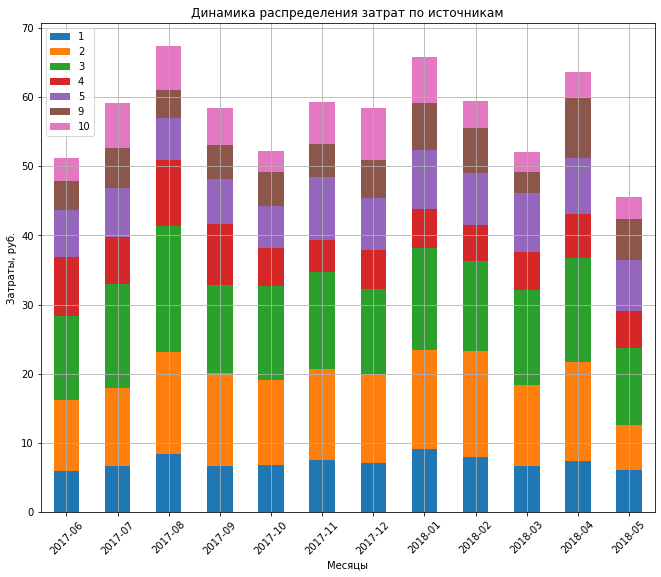

In [91]:
# график
_, ax = plt.subplots(figsize=(11,9))
cac_pivot_by_source.index = pd.Series(cac_pivot_by_source.index).dt.strftime('%Y-%m')
cac_pivot_by_source.plot(kind='bar', stacked=True, ax=ax)
plt.title('Динамика распределения затрат по источникам')
plt.xlabel('Месяцы')
plt.ylabel('Затраты, руб.')
plt.xticks(rotation=45)
plt.grid()
plt.legend(loc='upper left')
plt.show()

Вычисление стандартного отклонения и среднего cac по источникам

In [92]:
sources_std_stat = cac_pivot_by_source.std().to_frame('std').join(cac_pivot_by_source.mean().to_frame('mean'))
sources_std_stat

,std,mean
id_source,,
1,0.96,7.21
2,2.39,12.50
3,1.84,13.80
4,1.63,6.44
5,0.99,7.45
9,1.51,5.41
10,1.73,4.87


In [93]:
# добавление столбца с процентом отклонения
sources_std_stat['% отклонения'] = sources_std_stat['std'] / sources_std_stat['mean'] * 100
sources_std_stat = sources_std_stat.sort_values(by='% отклонения', ascending=False)
sources_std_stat

,std,mean,% отклонения
id_source,,,
10,1.73,4.87,35.45
9,1.51,5.41,27.86
4,1.63,6.44,25.29
2,2.39,12.50,19.15
3,1.84,13.80,13.32
1,0.96,7.21,13.28
5,0.99,7.45,13.28


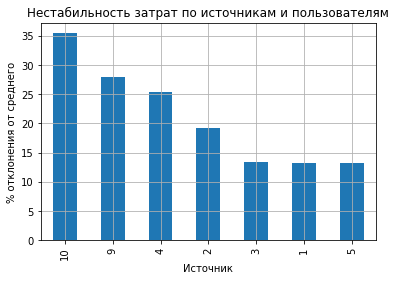

In [94]:
# графическое представление
sources_std_stat['% отклонения'].plot(kind='bar')
plt.title('Нестабильность затрат по источникам и пользователям')
plt.ylabel('% отклонения от среднего')
plt.xlabel('Источник')
plt.grid()
plt.show()

Самый нестабильный источник - 10-й с 35% отклонения по затратам, самые стабильные - 1, 3, 5 - около 15%.

In [95]:
print('Средние затраты на привлечение пользователя', cac_pivot_by_source.mean().mean().round(2), 'руб.')

Средние затраты на привлечение пользователя 8.24 руб.


Как видно из графика, разброс расходов исходя из одного пользователя значительно меньше, чем в целом за месяц, и там, где расходы в целом были ниже, расход на пользователя несколько больше, а при макс. расходах - расход на привлечение средний. Вывод - нужно тратить деньги на привлечение большего количества пользователей, т.к. каждый в отдельности в этом случае стоит меньше.

### Насколько окупились расходы? (ROMI)

Посмотрю на общий баланс за всё время:

In [96]:
# Все доходы - себестоимость = валовая прибыль
balance = orders.revenue_per_order.sum() - costs.cost_per_day.sum()
print('Валовая прибыль равна:', balance.round(2))

Валовая прибыль равна: -77074.42


Сразу видно, что сервис в целом не окупается.

[Ранее](#Сколько-денег-приносят?-(LTV)) я рассчитал LTV среди первых 6 когорт - с июня по декабрь 2017 включительно. Эта сумма составила 7.97 руб. Рассчитаю CAC аналогично за те же месяцы:

In [97]:
# объединяю таблицы затрат и количества пользователей в когортах
costs_table_merged = costs_table_by_month.merge(users_cohort_size_by_order, left_on=['costs_month','id_source'],
                           right_on=['first_order_month', 'id_source'], how='left')
costs_table_merged

,costs_month,id_source,cost_per_month,first_order_month,users
0,2017-06-01,1,1125.61,2017-06-01,190
1,2017-06-01,2,2427.38,2017-06-01,235
2,2017-06-01,3,7731.65,2017-06-01,638
3,2017-06-01,4,3514.80,2017-06-01,413
4,2017-06-01,5,2616.12,2017-06-01,384
...,...,...,...,...,...
79,2018-05-01,3,9411.42,2018-05-01,844
80,2018-05-01,4,4214.21,2018-05-01,804
81,2018-05-01,5,3669.56,2018-05-01,497
82,2018-05-01,9,362.17,2018-05-01,60


In [98]:
# Проверка
costs_table_merged.isnull().sum()
# ок

costs_month          0
id_source            0
cost_per_month       0
first_order_month    0
users                0
dtype: int64

In [99]:
# вычисляю сас
costs_table_merged['cac'] = costs_table_merged.cost_per_month / costs_table_merged.users
costs_table_merged

,costs_month,id_source,cost_per_month,first_order_month,users,cac
0,2017-06-01,1,1125.61,2017-06-01,190,5.92
1,2017-06-01,2,2427.38,2017-06-01,235,10.33
2,2017-06-01,3,7731.65,2017-06-01,638,12.12
3,2017-06-01,4,3514.80,2017-06-01,413,8.51
4,2017-06-01,5,2616.12,2017-06-01,384,6.81
...,...,...,...,...,...,...
79,2018-05-01,3,9411.42,2018-05-01,844,11.15
80,2018-05-01,4,4214.21,2018-05-01,804,5.24
81,2018-05-01,5,3669.56,2018-05-01,497,7.38
82,2018-05-01,9,362.17,2018-05-01,60,6.04


In [100]:
# фильтрация за первые 6 месяцев
cac_by_month = (costs_table_merged
[['2017' in ind for ind in costs_table_merged.costs_month.dt.strftime('%Y-%m')]]
.groupby('costs_month')
.agg({'cac' : 'mean'}))
cac_by_month

,cac
costs_month,
2017-06-01,7.31
2017-07-01,8.44
2017-08-01,9.62
2017-09-01,8.34
2017-10-01,7.45
2017-11-01,8.48
2017-12-01,8.35


In [101]:
# расчет ROMI
LTV = 7.97
CAC = cac_by_month.mean().values[0]
print('CAC = ', CAC.round(2))

ROMI = LTV / CAC
print('ROMI на данный момент составляет: {:.0%}'.format(ROMI))

CAC =  8.28
ROMI на данный момент составляет: 96%


За полгода затраты окупаются на 96%. Но это только себестоимость - маркетинговые затраты. По операционной прибыли, понятно, всё будет хуже и это неудовлетворительные результаты.

#### Статистика по источникам привлечения пользователей:

Размеры групп с разбивкой по рекламным источникам привлечения пользователя:

In [102]:
users_cohort_size_by_order

,first_order_month,id_source,users
0,2017-06-01,1,190
1,2017-06-01,2,235
2,2017-06-01,3,638
3,2017-06-01,4,413
4,2017-06-01,5,384
...,...,...,...
81,2018-05-01,4,804
82,2018-05-01,5,497
83,2018-05-01,9,60
84,2018-05-01,10,130


##### LTV по источникам:

In [103]:
# сопоставляю заказы и источники
orders_s = orders.merge(users_sources, how='left', on='uid')
orders_s

,purchase_time,revenue_per_order,uid,purchase_day,purchase_week,purchase_month,first_session_date,first_session_month,device_type,first_order_month,id_source
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2017-06,desktop,2017-06-01,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2017-06,desktop,2017-06-01,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2017-06,desktop,2017-06-01,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2017-06,desktop,2017-06-01,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2017-06,desktop,2017-06-01,3
...,...,...,...,...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31,2018-05-31,2018-05-01,2018-05-31,2018-05,desktop,2018-05-01,4
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31,2018-05-31,2018-05-01,2018-05-31,2018-05,desktop,2018-05-01,10
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31,2018-05-31,2018-05-01,2018-05-31,2018-05,desktop,2018-05-01,3
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31,2018-05-31,2018-05-01,2017-10-23,2017-10,desktop,2018-05-01,3


In [104]:
# проверка, для всех ли строк есть данные?
orders_s.isnull().sum()
# ок!

purchase_time          0
revenue_per_order      0
uid                    0
purchase_day           0
purchase_week          0
purchase_month         0
first_session_date     0
first_session_month    0
device_type            0
first_order_month      0
id_source              0
dtype: int64

In [105]:
# расчет размеров групп по источникам
groups_sizes_sources = (orders_s
                       .groupby('id_source', as_index=False)
                       .agg({'uid':'nunique'}))
groups_sizes_sources

,id_source,uid
0,1,2899
1,2,3506
2,3,10473
3,4,10296
4,5,6931
5,7,1
6,9,1088
7,10,1329


In [106]:
# суммарная выручка по каждому источнику
orders_stat_month_sources = (
    orders_s
    .groupby(['id_source'])
    .agg({'revenue_per_order': 'sum'})
    .rename(columns={'revenue_per_order':'revenue_per_source'})
    .reset_index()
)
orders_stat_month_sources

,id_source,revenue_per_source
0,1,31090.55
1,2,46923.61
2,3,54511.24
3,4,56696.83
4,5,52624.02
5,7,1.22
6,9,5759.40
7,10,4450.33


In [107]:
# расчет средней выручки с пользователя
orders_stat_month_sources = (orders_stat_month_sources
                            .merge(groups_sizes_sources, on='id_source', how='left')
                            .rename(columns={'uid': 'users'}))
orders_stat_month_sources

,id_source,revenue_per_source,users
0,1,31090.55,2899
1,2,46923.61,3506
2,3,54511.24,10473
3,4,56696.83,10296
4,5,52624.02,6931
5,7,1.22,1
6,9,5759.40,1088
7,10,4450.33,1329


In [108]:
# ltv
orders_stat_month_sources['ltv'] = orders_stat_month_sources.revenue_per_source /\
orders_stat_month_sources.users
orders_stat_month_sources.sort_values(by='ltv', ascending=False, inplace=True)
orders_stat_month_sources

,id_source,revenue_per_source,users,ltv
1,2,46923.61,3506,13.38
0,1,31090.55,2899,10.72
4,5,52624.02,6931,7.59
3,4,56696.83,10296,5.51
6,9,5759.40,1088,5.29
2,3,54511.24,10473,5.20
7,10,4450.33,1329,3.35
5,7,1.22,1,1.22


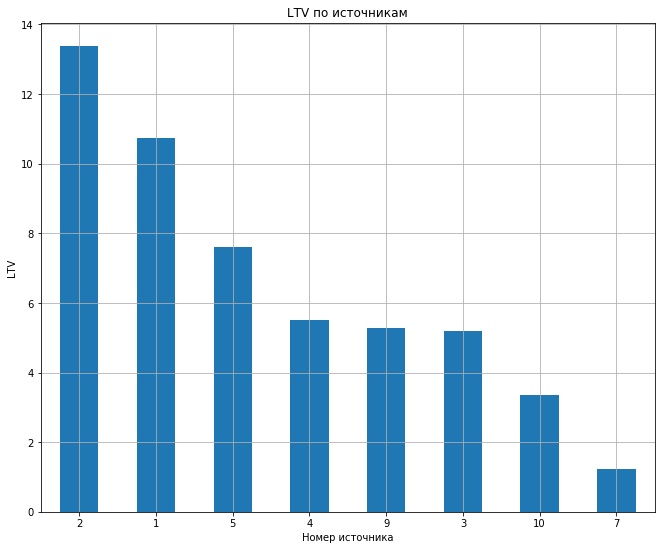

In [109]:
# график
_, ax = plt.subplots(figsize=(11,9))
orders_stat_month_sources.set_index('id_source').ltv.plot(kind='bar')
plt.title('LTV по источникам')
plt.ylabel('LTV')
plt.xlabel('Номер источника')
plt.xticks(rotation=0)
plt.grid()
plt.show()

In [110]:
print('Среднее ltv по источникам за всё время:', orders_stat_month_sources.iloc[:,-1].mean().round(2))

Среднее ltv по источникам за всё время: 6.53


Видно, что больше всего прибыли с пользователя приносят 2 и 1 источники, 7-й в аутсайдерах. Рассчитаю CAC.

##### CAC по источникам:

In [111]:
# собираю таблицу затрат по источникам
costs_month_stat = (
    costs
    .groupby('id_source', as_index=False)
    .agg({'cost_per_day': 'sum'})
    .rename(columns={'cost_per_day': 'cost_per_source'})
)
costs_month_stat

,id_source,cost_per_source
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


Расчет сас

In [112]:
cac_sources = (
    costs_month_stat
    .merge(groups_sizes_sources, on='id_source')
    .rename(columns={'uid':'users'})
)
cac_sources

,id_source,cost_per_source,users
0,1,20833.27,2899
1,2,42806.04,3506
2,3,141321.63,10473
3,4,61073.60,10296
4,5,51757.10,6931
5,9,5517.49,1088
6,10,5822.49,1329


In [113]:
cac_sources['cac'] = cac_sources.cost_per_source / cac_sources.users
cac_sources = cac_sources.loc[:,['id_source', 'cac']]
cac_sources.sort_values(by='cac', ascending=False, inplace=True)

,id_source,cac
2,3,13.49
1,2,12.21
4,5,7.47
0,1,7.19
3,4,5.93
5,9,5.07
6,10,4.38


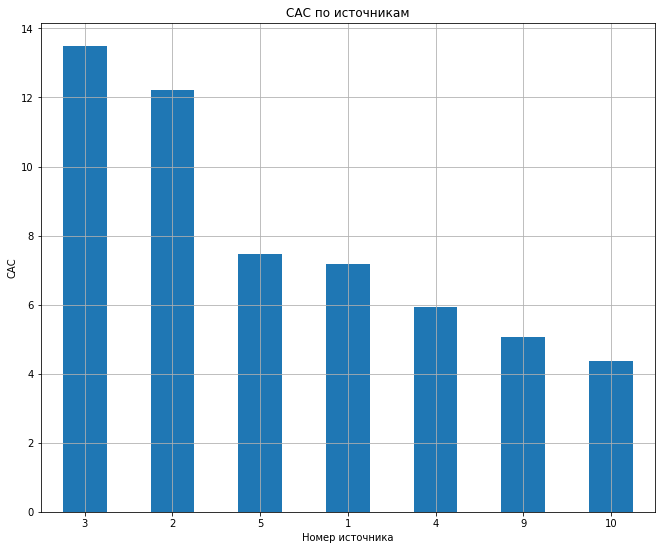

In [114]:
display(cac_sources)
_, ax = plt.subplots(figsize=(11,9))
cac_sources.set_index('id_source').cac.plot(kind='bar')
plt.title('CAC по источникам')
plt.ylabel('CAC')
plt.xlabel('Номер источника')
plt.xticks(rotation=0)
plt.grid()
plt.show()

Видно, что затраты больше всего на 3-й источник, который не был в лидерах по прибыли с пользователя. Уже сейчас, до расчета ROMI, видно, что с ним явно проблемы.

##### Рассчитаю ROMI по источникам.

In [115]:
# расчет romi
romi_sources = (
    orders_stat_month_sources[['id_source', 'ltv']].merge(cac_sources, on='id_source')
    .set_index('id_source')
)
romi_sources['romi'] = romi_sources.ltv / romi_sources.cac
romi_sources = romi_sources.drop(columns=['cac', 'ltv'])
romi_sources.sort_values(by='romi', ascending=False, inplace=True)


,romi
id_source,
1,1.49
2,1.10
9,1.04
5,1.02
4,0.93
10,0.76
3,0.39


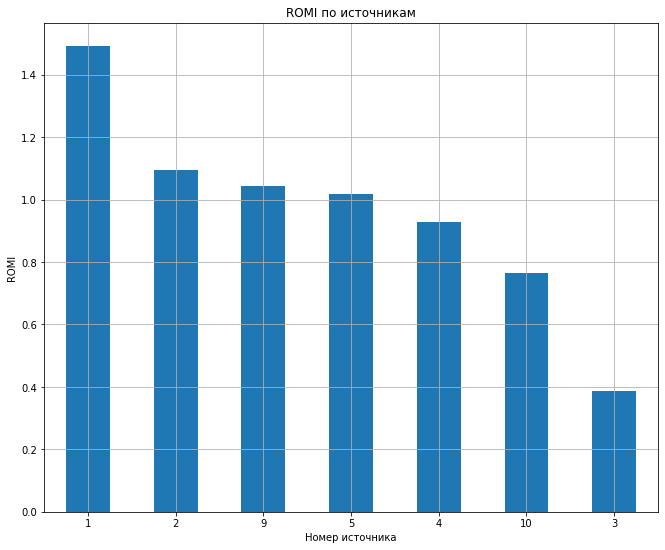

In [116]:
display(romi_sources)
_, ax = plt.subplots(figsize=(11,9))
romi_sources.romi.plot(kind='bar')
plt.title('ROMI по источникам')
plt.ylabel('ROMI')
plt.xlabel('Номер источника')
plt.xticks(rotation=0)
plt.grid()
plt.show()

Вывод: лучше всего окупается 1 источник, хуже всего 3. Стоит разобраться, что такое есть в 1-м, и чего нет в 10 и особенно 3-м для увеличения прибыли.

#### Рассмотрю, как метрики различаются по устройствам:

##### Статистика по устройствам:

In [117]:
# сопоставление пользователей и устройств, с которых они впервые зашли на сервис
users_devs = (
    orders
    .sort_values(by='purchase_time', ascending=True)
    .groupby('uid', as_index=False)
    .agg({'device_type': 'first'})
)
users_devs

,uid,device_type
0,313578113262317,desktop
1,1575281904278712,touch
2,2429014661409475,desktop
3,2464366381792757,desktop
4,2551852515556206,desktop
...,...,...
36518,18445147675727495770,touch
36519,18445407535914413204,desktop
36520,18445601152732270159,desktop
36521,18446156210226471712,desktop


In [118]:
# размеры групп пользователей по устройствам входа
groups_sizes_devs = (
    users_devs
    .groupby('device_type', as_index=False)
    .agg({'uid': 'nunique'})
    .rename(columns={'uid': 'users'})
)
print('Размеры групп пользователей по устройствам входа:')
groups_sizes_devs

Размеры групп пользователей по устройствам входа:


,device_type,users
0,desktop,29222
1,touch,7301


##### LTV по устройствам:

In [119]:
# статистика по заказам и выручке
orders_stat_month_devs = (
    orders
    .groupby('device_type')
    .agg({'revenue_per_order': 'sum'})
    .rename(columns={'revenue_per_order':'revenue_per_device'})
    .reset_index()
)
orders_stat_month_devs

,device_type,revenue_per_device
0,desktop,211531.81
1,touch,40525.39


In [120]:
# расчет LTV
orders_stat_month_devs = (
    orders_stat_month_devs
    .merge(groups_sizes_devs, on='device_type', how='left')
)
orders_stat_month_devs

,device_type,revenue_per_device,users
0,desktop,211531.81,29222
1,touch,40525.39,7301


In [121]:
orders_stat_month_devs['ltv'] = orders_stat_month_devs.revenue_per_device /\
orders_stat_month_devs.users
orders_stat_month_devs

,device_type,revenue_per_device,users,ltv
0,desktop,211531.81,29222,7.24
1,touch,40525.39,7301,5.55


,device_type,ltv
0,desktop,7.24
1,touch,5.55


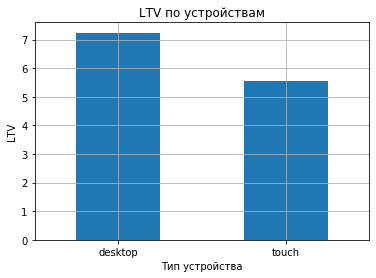

In [122]:
# графический результат
display(orders_stat_month_devs[['device_type', 'ltv']])
_, ax = plt.subplots()
orders_stat_month_devs.set_index('device_type').ltv.plot(kind='bar')
plt.title('LTV по устройствам')
plt.ylabel('LTV')
plt.xlabel('Тип устройства')
plt.xticks(rotation=0)
plt.grid()
plt.show()

In [123]:
print('Среднее ltv по устройствам за всё время:', orders_stat_month_devs.ltv.mean().round(2))

Среднее ltv по устройствам за всё время: 6.39


##### CAC по устройствам.  
Рассчитаю через данные по источникам, определив долю устройства в каждом источнике по первому, с которого заходил пользователь и имеющимся данным по затратам на источники.

In [124]:
# сколько было заходов с каждого типа устройств в каждый месяц
source_dev_stat = (
    orders_s
    .groupby(['first_order_month', 'id_source', 'device_type'], as_index=False)
    .agg({'uid': 'nunique'})
    .rename(columns={'uid': 'users'}))
source_dev_stat

,first_order_month,id_source,device_type,users
0,2017-06-01,1,desktop,164
1,2017-06-01,1,touch,26
2,2017-06-01,2,desktop,192
3,2017-06-01,2,touch,43
4,2017-06-01,3,desktop,548
...,...,...,...,...
165,2018-05-01,9,desktop,49
166,2018-05-01,9,touch,11
167,2018-05-01,10,desktop,98
168,2018-05-01,10,touch,32


In [125]:
# суммарное количество пользователей по источникам каждый месяц
users_sum_devs_by_sources = (source_dev_stat
                                    .groupby(['first_order_month', 'id_source'])['users']
                                    .sum())
users_sum_devs_by_sources

first_order_month  id_source
2017-06-01         1            190
                   2            235
                   3            638
                   4            413
                   5            384
                               ... 
2018-05-01         4            804
                   5            497
                   9             60
                   10           130
2018-06-01         4              1
Name: users, Length: 86, dtype: int64

In [126]:
# подготовка к расчету процента устройств
source_dev_stat = (source_dev_stat
                   .merge(users_sum_devs_by_sources, on=['first_order_month', 'id_source'],
                          how='left', suffixes=('', '_sum_devs')))
source_dev_stat

,first_order_month,id_source,device_type,users,users_sum_devs
0,2017-06-01,1,desktop,164,190
1,2017-06-01,1,touch,26,190
2,2017-06-01,2,desktop,192,235
3,2017-06-01,2,touch,43,235
4,2017-06-01,3,desktop,548,638
...,...,...,...,...,...
165,2018-05-01,9,desktop,49,60
166,2018-05-01,9,touch,11,60
167,2018-05-01,10,desktop,98,130
168,2018-05-01,10,touch,32,130


In [127]:
# расчет процента устройств для каждого источника и месяца
source_dev_stat['dev_pct'] = source_dev_stat.users / source_dev_stat.users_sum_devs
source_dev_stat

,first_order_month,id_source,device_type,users,users_sum_devs,dev_pct
0,2017-06-01,1,desktop,164,190,0.86
1,2017-06-01,1,touch,26,190,0.14
2,2017-06-01,2,desktop,192,235,0.82
3,2017-06-01,2,touch,43,235,0.18
4,2017-06-01,3,desktop,548,638,0.86
...,...,...,...,...,...,...
165,2018-05-01,9,desktop,49,60,0.82
166,2018-05-01,9,touch,11,60,0.18
167,2018-05-01,10,desktop,98,130,0.75
168,2018-05-01,10,touch,32,130,0.25


In [128]:
# удаление ненужных колонок
source_dev_pct_by_month = source_dev_stat.drop(columns=['users', 'users_sum_devs'])
source_dev_pct_by_month

,first_order_month,id_source,device_type,dev_pct
0,2017-06-01,1,desktop,0.86
1,2017-06-01,1,touch,0.14
2,2017-06-01,2,desktop,0.82
3,2017-06-01,2,touch,0.18
4,2017-06-01,3,desktop,0.86
...,...,...,...,...
165,2018-05-01,9,desktop,0.82
166,2018-05-01,9,touch,0.18
167,2018-05-01,10,desktop,0.75
168,2018-05-01,10,touch,0.25


In [129]:
# переименование колонок, приведение типов
costs_stat = costs_stat.rename(columns={'cost_per_day': 'cost_per_month'})
costs_stat.date_month = costs_stat.date_month.astype('datetime64[M]')
costs_stat

,date_month,id_source,cost_per_month
0,2017-06-01,1,1125.61
1,2017-06-01,2,2427.38
2,2017-06-01,3,7731.65
3,2017-06-01,4,3514.80
4,2017-06-01,5,2616.12
...,...,...,...
79,2018-05-01,3,9411.42
80,2018-05-01,4,4214.21
81,2018-05-01,5,3669.56
82,2018-05-01,9,362.17


In [130]:
# объединение таблиц
source_dev_pct_by_month = source_dev_pct_by_month.merge(costs_stat, right_on=['date_month', 'id_source'], 
                              left_on=['first_order_month', 'id_source'], how='left')
source_dev_pct_by_month

,first_order_month,id_source,device_type,dev_pct,date_month,cost_per_month
0,2017-06-01,1,desktop,0.86,2017-06-01,1125.61
1,2017-06-01,1,touch,0.14,2017-06-01,1125.61
2,2017-06-01,2,desktop,0.82,2017-06-01,2427.38
3,2017-06-01,2,touch,0.18,2017-06-01,2427.38
4,2017-06-01,3,desktop,0.86,2017-06-01,7731.65
...,...,...,...,...,...,...
165,2018-05-01,9,desktop,0.82,2018-05-01,362.17
166,2018-05-01,9,touch,0.18,2018-05-01,362.17
167,2018-05-01,10,desktop,0.75,2018-05-01,409.86
168,2018-05-01,10,touch,0.25,2018-05-01,409.86


In [131]:
# проверка
source_dev_pct_by_month.isnull().sum()

first_order_month    0
id_source            0
device_type          0
dev_pct              0
date_month           2
cost_per_month       2
dtype: int64

In [132]:
# 2 пользователя заблудились, удалю)
source_dev_pct_by_month.dropna(inplace=True)

In [133]:
# разделение затрат по устройствам на каждый месяц
source_dev_pct_by_month['cost_per_dev'] = source_dev_pct_by_month.cost_per_month *\
source_dev_pct_by_month.dev_pct
source_dev_pct_by_month.drop(columns=['first_order_month'])
source_dev_pct_by_month

,first_order_month,id_source,device_type,dev_pct,date_month,cost_per_month,cost_per_dev
0,2017-06-01,1,desktop,0.86,2017-06-01,1125.61,971.58
1,2017-06-01,1,touch,0.14,2017-06-01,1125.61,154.03
2,2017-06-01,2,desktop,0.82,2017-06-01,2427.38,1983.22
3,2017-06-01,2,touch,0.18,2017-06-01,2427.38,444.16
4,2017-06-01,3,desktop,0.86,2017-06-01,7731.65,6640.98
...,...,...,...,...,...,...,...
164,2018-05-01,5,touch,0.19,2018-05-01,3669.56,701.42
165,2018-05-01,9,desktop,0.82,2018-05-01,362.17,295.77
166,2018-05-01,9,touch,0.18,2018-05-01,362.17,66.40
167,2018-05-01,10,desktop,0.75,2018-05-01,409.86,308.97


In [134]:
# проверка общих затрат
costs.cost_per_day.sum() == source_dev_pct_by_month.cost_per_dev.sum()

True

In [135]:
# общие затраты на устройства
dev_costs = (source_dev_pct_by_month
                        .groupby('device_type')
                        .cost_per_dev.sum()
                       )
dev_costs

device_type
desktop   264978.41
touch      64153.21
Name: cost_per_dev, dtype: float64

In [136]:
# проверка
costs.cost_per_day.sum() == dev_costs.sum()

True

In [137]:
# проверка
orders.uid.nunique() == groups_sizes_devs.users.sum()

True

In [138]:
# test
groups_sizes_devs

,device_type,users
0,desktop,29222
1,touch,7301


In [139]:
# расчет cac для устройств
cac_per_dev = (dev_costs
              .to_frame('cost_per_dev')
              .merge(groups_sizes_devs.set_index('device_type'),
                     left_index=True, right_index=True, how='left'))
cac_per_dev['cac'] = cac_per_dev.cost_per_dev / cac_per_dev.users
cac_per_dev = cac_per_dev[['cac']]
cac_per_dev

,cac
device_type,
desktop,9.07
touch,8.79


##### Рассчитаю ROMI по устройствам.

In [140]:
# подготовка таблицы LTV
ltv_devs = orders_stat_month_devs[['device_type', 'ltv']].set_index('device_type')
ltv_devs

,ltv
device_type,
desktop,7.24
touch,5.55


In [141]:
romi_devs = (
    ltv_devs.merge(cac_per_dev, left_index=True, right_index=True)
)
romi_devs

,ltv,cac
device_type,,
desktop,7.24,9.07
touch,5.55,8.79


In [142]:
# расчет ROMI
romi_devs['romi'] = romi_devs.ltv / romi_devs.cac
romi_devs.drop(columns=['ltv', 'cac'], inplace=True)
romi_devs

,romi
device_type,
desktop,0.80
touch,0.63


,romi
device_type,
desktop,0.80
touch,0.63


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  # This is added back by InteractiveShellApp.init_path()


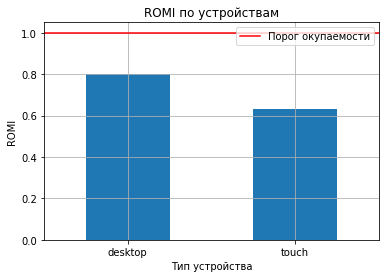

In [143]:
# ROMI по устройствам:
display(romi_devs)
_, ax = plt.subplots()
romi_devs.romi.plot(kind='bar')
plt.title('ROMI по устройствам')
plt.ylabel('ROMI')
plt.xlabel('Тип устройства')
plt.xticks(rotation=0)
l = plt.axhline(1, color='r')
# plt.xlim(0,1.1)
plt.legend((l,), labels=('Порог окупаемости',))
plt.grid()
plt.show()

Вывод: если смотреть ROMI по устройствам, окупаемости не достигает ни один тип. Всё потому, что вместе с окупаемыми источниками статистика считается и по неокупаемым.

#### ROMI по когортам, сформированным по месяцу первой покупки:

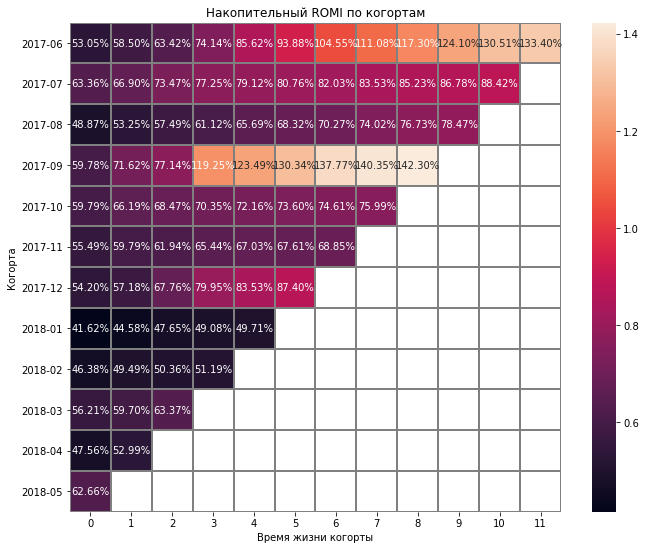

In [144]:
# определение параметров
paramstr=''
costs_pct=1
vmax=None
#     статистика по затратам
costs_stat = costs.groupby(['costs_month'])\
.agg({'cost_per_day': 'sum'})\
.rename(columns={'cost_per_day':'costs'})\
.reset_index()
costs_stat['costs'] = costs_stat['costs'] * costs_pct

#   статистика по заказам
orders_stat = orders.groupby(['first_order_month', 'purchase_month'])\
.agg({'revenue_per_order': 'sum'}).reset_index()
orders_stat = orders_stat.rename(columns={'revenue_per_order':'cohort_month_revenue'})

orders_stat['lifetime'] = ((orders_stat['purchase_month'] \
                          - pd.to_datetime(orders_stat['first_order_month'])) /\
                         np.timedelta64(1, 'M')).round().astype('int')
#     объединение таблиц
stat = orders_stat.merge(costs_stat, how='outer', 
                       left_on='first_order_month', 
                       right_on='costs_month')

stat['ROMI'] = stat['cohort_month_revenue'] / stat['costs']

ROMI_stat = stat.pivot_table(index='first_order_month',
                            columns='lifetime',
                            values='ROMI',
                            aggfunc='mean').cumsum(axis=1)
ROMI_stat.index = pd.Series(ROMI_stat.index).dt.strftime('%Y-%m')
_, ax = plt.subplots(figsize=(11,9))
sns.heatmap(ROMI_stat, annot=True, fmt='.2%', ax=ax,
           linecolor='gray', linewidths=1, vmax=vmax)
ax.set_title('Накопительный ROMI по когортам'+paramstr)
ax.set_xlabel('Время жизни когорты')
ax.set_ylabel('Когорта')
plt.show()

Усредню данные за первые 6 месяцев (6 и более когорт):

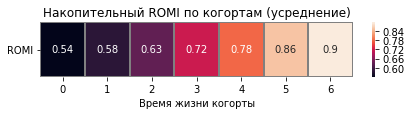

In [145]:
ROMI_mean_6 = ROMI_stat.mean()[:7].to_frame('ROMI').T
_, ax = plt.subplots(figsize=(7,1))
sns.heatmap(ROMI_mean_6, annot=True, linewidths=1, linecolor='gray',)
plt.title('Накопительный ROMI по когортам (усреднение)')
plt.xlabel('Время жизни когорты')
plt.yticks(rotation=0)
plt.show()

Видно, что первая когорта окупилась к 7-му месяцу жизни. Остальные к этому времени не окупились, кроме когорты сентября 2017, LTV которой резко возросло за счет отдельных больших покупок, это случайность, а не закономерность, и на неё полагаться нельзя.
В целом видно, что после первой когорты произошло ухудшение окупаемости, возможно, были отменены выгодные условия или в игру вступил конкурент.

## Шаг 3. Вывод

### Исходные данные:  
Для исследования были предоставлены данные о сессиях, покупках и затратах на сервисе "Афиши" с июня 2017 по май 2018.

Предоставленные данные в целом корректны, за исключением формата временных меток и дат.

Я проверил корректность данных, применил когортный анализ, разделив на когорты по месяцу первой сессии, рассчитал необходимые метрики.

### Полученные выводы:
Сессий в день в среднем - 921. Среднее время от первого посещения сервиса до первой покупки совпадает со средней длительностью сессии, и график практически идентичен. Выходит, пользователи совершают покупку чаще всего в первую сессию.

Пользователи проявляют большую активность на сервисе с октября по март включительно (лучше всего это видно на посещении за неделю, т.к. она лучше всего соответствует периодичности посещения мероприятий людьми). Похоже, это связано с сезонностью и в теплые месяцы люди чаще выбирают прогулки и др. активность на свежем воздухе. С этим нужно смириться, т.к. на сезонность мы повлиять не можем.

#### Продажи:  
За месяц формирования когорт совершается 82% заказов на 82% от среднего чека пользователя. После этого выручка резко падает (более 5 раз за все оставшиеся месяцы).

Наиболее распространенное время от начала сессии до покупки - 1 минута. Довольно быстро, пользователи **покупали не просматривая афишу**, либо уже знали, что им нужно, либо им подходило то, что было на главной странице. В любом случае, похоже, в подавляющем большинстве случаев функционал сервиса *не использовался в полной мере*.

Первая когорта окупилась к 7-му месяцу жизни, остальные, за исключением когорты сентября 2017 (видимо, из-за отдельных больших покупок), показывают результаты хуже, ситуация ухудшилась, возможно, компания отменила какие-то выгодные условия, и сервис стал не столь привлекателен для пользователей и они ушли к конкурентам?

Количество заказов в среднем в месяц на пользователя сохраняет стабильность (от 1.16 до 1.27), однако находится на *очень низком уровне*.

Средний чек в по мобильным устройствам чуть ниже, чем для стационарных (5.07 руб. против 6.09 руб.), но ***гораздо хуже, что*** доля выручки с мобильных устройств составляет **всего 16%**, и это для сервиса *outgoing* мероприятий, для которых важна мобильность, явно с мобильной версией что-то не так.

#### Затраты:  
Менялись затраты в целом по источникам, наибольшие были в октябре - декабре 2017, наименьшие - в июне-августе 2017, а соотношение по источникам оставалось приблизительно одинаковым.

Самый нестабильный источник - 10-й с 35% отклонения по затратам, самые стабильные - 1, 3, 5 - около 15%.

Самые большие затраты были с октября по март включительно, однако в расчете на одного пользователя эти затраты получаются средними. Влияет опять же сезонность.

***3 источник - лидер по затратам***, на 9, 10 что-то тратится, но меньше других, а 6-8 источники вообще не используются.

#### Окупаемость:  
За ***полгода*** затраты окупаются в среднем на 96%. Но это *только себестоимость* - маркетинговые затраты. По операционной прибыли, понятно, всё будет хуже и это неудовлетворительные результаты.

Если смотреть ***ROMI по устройствам***, окупаемости не достигает ни один тип. Всё потому, что вместе с окупаемыми источниками статистика считается и по неокупаемым.

Видно, что первая когорта окупилась к 7-му месяцу жизни. Остальные к этому времени не окупились, кроме когорты сентября 2017, LTV которой резко возросло за счет отдельных больших покупок, это случайность, а не закономерность, и на неё полагаться нельзя. В целом видно, что после первой когорты произошло ухудшение окупаемости, возможно, были отменены выгодные условия или в игру вступил конкурент.

### Итого, на что обратить внимание в первую очередь:

Наиболее информативна разбивка ***ROMI по источникам***, сразу видно, какой окупается, а какой нет. **Значительно хуже** других себя проявил **3-й источник**.

***Мобильная версия***. Для такого рода сервисов они должны лидировать, однако тут эффект обратный, и хуже всего обстоит дело с **долей выручки** с мобильных устройств - **всего 16%!**

***Отток пользователей*** - очень высокий, **более 95%** уже к концу **0-го** месяца жизни когорт!

Покупки в сервисе совершали лишь 16% пользователей и чаще всего уже через минуту. **Функционал сервиса не использовался в полной мере**. Стоит поискать ошибки в его интерфейсе и стабильности работы.